In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

$$
\begin{align}
    \hat{y}_i
    &= \beta x_i + \alpha
    \\
    y_i &= \beta x_i + \alpha + \epsilon_i
\end{align}
$$

In [2]:
dcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

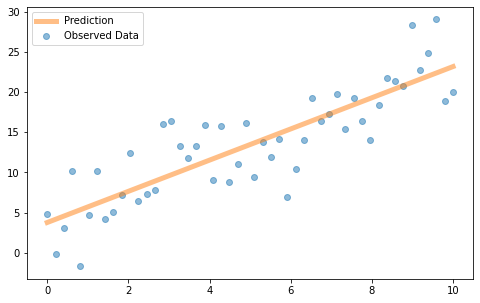

In [3]:
# pseudo-random generator
np.random.seed(123)

# nubmer of observations
n = 50

## Setup

# independent variable
X = np.linspace(0, 10, n)

# true parameters
true_beta = np.random.normal(3, 1)
true_alpha = np.random.normal(3, 1)

# true relationship
Y_true = true_beta * X + true_alpha

# plot
fig = plt.figure(figsize=(8, 5))
# plt.plot(X, Y_true, alpha=0.5, lw=5, label='True Relationship')


## Observation

# observations with noise
noise = np.random.normal(0, 3, n)
Y = Y_true + noise

plt.scatter(X, Y, alpha=0.5, label='Observed Data')

## Model estimation

# means
y_bar = Y.sum() / n
x_bar = X.sum() / n

# difference from mean
X_diff = X - x_bar
Y_diff = Y - y_bar

# variance
var_x = sum(X_diff**2)/n
var_y = sum(Y_diff**2)/n

# covariance
cov_xy = sum(X_diff * Y_diff) / n

# estimated paramters
beta = cov_xy / var_x
alpha = y_bar - beta * x_bar

# model prediction
Y_hat = beta * X + alpha
plt.plot(X, Y_hat, lw=5, alpha=0.5, color=dcolors[1], label='Prediction')


plt.legend()
plt.show()

In [4]:
# SSE: sum of squared errors
errors = Y - Y_hat
sse = sum(errors**2)

# SSR: sum of squared residuals
ssr = sum((Y_hat - y_bar)**2)

# SST: sum of squared totals
sst = n * var_y

# R^2
r_sq = 1 - sse / sst


print(f'SSE: \t{sse:.5f}')
print(f'SSR: \t{ssr:.5f}')
print(f'SST: \t{sst:.5f}')
print(f'R^2: \t{r_sq:.5f}')

SSE: 	641.32848
SSR: 	1637.93086
SST: 	2279.25934
R^2: 	0.71862


Guess SSE: 758.97


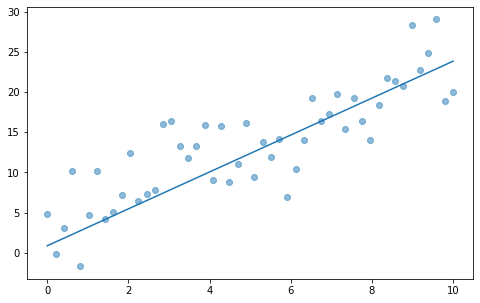

In [5]:
# gradient descent
learning_rate = 0.05

fig = plt.figure(figsize=(8, 5))

# initial guess
guess_beta = 2.35
guess_alpha = 0.8563

# initial prediction
guess_Y = guess_beta * X + guess_alpha

# initial error of prediction
guess_sse_prev = sum((Y - guess_Y)**2)


## check if we can do any better by increasing guess_beta ##
guess_beta += learning_rate

# recalc prediction and error
guess_Y = guess_beta * X + guess_alpha
guess_sse = sum((Y - guess_Y)**2)

# if new error is higher than previous
if guess_sse > guess_sse_prev:
    guess_beta -= learning_rate


## check if we can do any better by increasing guess_beta ##
guess_beta -= learning_rate

# recalc prediction and error
guess_Y = guess_beta * X + guess_alpha
guess_sse = sum((Y - guess_Y)**2)

# if new error is higher than previous
if guess_sse > guess_sse_prev:
    guess_beta += learning_rate


plt.plot(X, guess_Y, label="guess")

plt.scatter(X, Y, alpha=0.5, label="data")


print(f'Guess SSE: {guess_sse:.2f}')

In [6]:
guess = {'beta':0, 'alpha':0}

In [7]:
guess

{'beta': 0, 'alpha': 0}

In [8]:
sse, beta, alpha

(641.3284827000938, 1.9434186017592694, 3.7572384419368348)

### OLS: Ordiary Least squared errors

Sum of squared errors (SSE):
$$
    sse = \sum_{i=1}^n(\hat{y} - y)^2
$$

In [9]:
%%time

# crude gradient descent: no math at all

lr = 1e-4
n_iter = 100_000
convergence = 1e-8

guess = {'beta':0, 'alpha':0}

for i in range(n_iter):

    # calculate error for checking convergence
    pred = guess['beta'] * X + guess['alpha']
    conv_error = sum((Y - pred)**2)
    
    print(f'{i} \t SSE: \t {conv_error:.5f} \t beta: {guess["beta"]:.5f} \t alpha: {guess["alpha"]:.5f}')

    for param in guess:
        
        for step in [lr, -lr]:
              
            # current error (taste lemonade before changing ingredient)
            pred = guess['beta'] * X + guess['alpha']
            error = sum((Y - pred)**2)

            # update parameter (changing ingredient)
            guess[param] += step

            # new error after changing parameter (taste after changing ingredient)
            pred = guess['beta'] * X + guess['alpha']
            new_error = sum((Y - pred)**2)

            # if change is bad, change back (if lemonade is worse after change, undo ingredient change)
            if new_error > error:
                guess[param] -= step

    # recalculate error for convergence
    pred = guess['beta'] * X + guess['alpha']
    new_conv_error = sum((Y - pred)**2)
    
    if abs(conv_error - new_conv_error) < convergence:
        print("> Converged")
        break
    

0 	 SSE: 	 11357.13974 	 beta: 0.00000 	 alpha: 0.00000
1 	 SSE: 	 11356.16274 	 beta: 0.00010 	 alpha: 0.00010
2 	 SSE: 	 11355.18579 	 beta: 0.00020 	 alpha: 0.00020
3 	 SSE: 	 11354.20888 	 beta: 0.00030 	 alpha: 0.00030
4 	 SSE: 	 11353.23201 	 beta: 0.00040 	 alpha: 0.00040
5 	 SSE: 	 11352.25519 	 beta: 0.00050 	 alpha: 0.00050
6 	 SSE: 	 11351.27842 	 beta: 0.00060 	 alpha: 0.00060
7 	 SSE: 	 11350.30169 	 beta: 0.00070 	 alpha: 0.00070
8 	 SSE: 	 11349.32500 	 beta: 0.00080 	 alpha: 0.00080
9 	 SSE: 	 11348.34836 	 beta: 0.00090 	 alpha: 0.00090
10 	 SSE: 	 11347.37176 	 beta: 0.00100 	 alpha: 0.00100
11 	 SSE: 	 11346.39521 	 beta: 0.00110 	 alpha: 0.00110
12 	 SSE: 	 11345.41870 	 beta: 0.00120 	 alpha: 0.00120
13 	 SSE: 	 11344.44224 	 beta: 0.00130 	 alpha: 0.00130
14 	 SSE: 	 11343.46582 	 beta: 0.00140 	 alpha: 0.00140
15 	 SSE: 	 11342.48944 	 beta: 0.00150 	 alpha: 0.00150
16 	 SSE: 	 11341.51311 	 beta: 0.00160 	 alpha: 0.00160
17 	 SSE: 	 11340.53683 	 beta: 0.00170 	

552 	 SSE: 	 10824.62985 	 beta: 0.05520 	 alpha: 0.05520
553 	 SSE: 	 10823.67752 	 beta: 0.05530 	 alpha: 0.05530
554 	 SSE: 	 10822.72522 	 beta: 0.05540 	 alpha: 0.05540
555 	 SSE: 	 10821.77297 	 beta: 0.05550 	 alpha: 0.05550
556 	 SSE: 	 10820.82076 	 beta: 0.05560 	 alpha: 0.05560
557 	 SSE: 	 10819.86860 	 beta: 0.05570 	 alpha: 0.05570
558 	 SSE: 	 10818.91649 	 beta: 0.05580 	 alpha: 0.05580
559 	 SSE: 	 10817.96442 	 beta: 0.05590 	 alpha: 0.05590
560 	 SSE: 	 10817.01239 	 beta: 0.05600 	 alpha: 0.05600
561 	 SSE: 	 10816.06041 	 beta: 0.05610 	 alpha: 0.05610
562 	 SSE: 	 10815.10847 	 beta: 0.05620 	 alpha: 0.05620
563 	 SSE: 	 10814.15658 	 beta: 0.05630 	 alpha: 0.05630
564 	 SSE: 	 10813.20473 	 beta: 0.05640 	 alpha: 0.05640
565 	 SSE: 	 10812.25292 	 beta: 0.05650 	 alpha: 0.05650
566 	 SSE: 	 10811.30117 	 beta: 0.05660 	 alpha: 0.05660
567 	 SSE: 	 10810.34945 	 beta: 0.05670 	 alpha: 0.05670
568 	 SSE: 	 10809.39778 	 beta: 0.05680 	 alpha: 0.05680
569 	 SSE: 	 1

1083 	 SSE: 	 10325.22375 	 beta: 0.10830 	 alpha: 0.10830
1084 	 SSE: 	 10324.29513 	 beta: 0.10840 	 alpha: 0.10840
1085 	 SSE: 	 10323.36656 	 beta: 0.10850 	 alpha: 0.10850
1086 	 SSE: 	 10322.43803 	 beta: 0.10860 	 alpha: 0.10860
1087 	 SSE: 	 10321.50954 	 beta: 0.10870 	 alpha: 0.10870
1088 	 SSE: 	 10320.58110 	 beta: 0.10880 	 alpha: 0.10880
1089 	 SSE: 	 10319.65271 	 beta: 0.10890 	 alpha: 0.10890
1090 	 SSE: 	 10318.72436 	 beta: 0.10900 	 alpha: 0.10900
1091 	 SSE: 	 10317.79605 	 beta: 0.10910 	 alpha: 0.10910
1092 	 SSE: 	 10316.86779 	 beta: 0.10920 	 alpha: 0.10920
1093 	 SSE: 	 10315.93958 	 beta: 0.10930 	 alpha: 0.10930
1094 	 SSE: 	 10315.01141 	 beta: 0.10940 	 alpha: 0.10940
1095 	 SSE: 	 10314.08328 	 beta: 0.10950 	 alpha: 0.10950
1096 	 SSE: 	 10313.15520 	 beta: 0.10960 	 alpha: 0.10960
1097 	 SSE: 	 10312.22716 	 beta: 0.10970 	 alpha: 0.10970
1098 	 SSE: 	 10311.29917 	 beta: 0.10980 	 alpha: 0.10980
1099 	 SSE: 	 10310.37122 	 beta: 0.10990 	 alpha: 0.109

1439 	 SSE: 	 9997.45866 	 beta: 0.14390 	 alpha: 0.14390
1440 	 SSE: 	 9996.54594 	 beta: 0.14400 	 alpha: 0.14400
1441 	 SSE: 	 9995.63327 	 beta: 0.14410 	 alpha: 0.14410
1442 	 SSE: 	 9994.72065 	 beta: 0.14420 	 alpha: 0.14420
1443 	 SSE: 	 9993.80807 	 beta: 0.14430 	 alpha: 0.14430
1444 	 SSE: 	 9992.89553 	 beta: 0.14440 	 alpha: 0.14440
1445 	 SSE: 	 9991.98304 	 beta: 0.14450 	 alpha: 0.14450
1446 	 SSE: 	 9991.07059 	 beta: 0.14460 	 alpha: 0.14460
1447 	 SSE: 	 9990.15819 	 beta: 0.14470 	 alpha: 0.14470
1448 	 SSE: 	 9989.24584 	 beta: 0.14480 	 alpha: 0.14480
1449 	 SSE: 	 9988.33352 	 beta: 0.14490 	 alpha: 0.14490
1450 	 SSE: 	 9987.42126 	 beta: 0.14500 	 alpha: 0.14500
1451 	 SSE: 	 9986.50903 	 beta: 0.14510 	 alpha: 0.14510
1452 	 SSE: 	 9985.59686 	 beta: 0.14520 	 alpha: 0.14520
1453 	 SSE: 	 9984.68472 	 beta: 0.14530 	 alpha: 0.14530
1454 	 SSE: 	 9983.77263 	 beta: 0.14540 	 alpha: 0.14540
1455 	 SSE: 	 9982.86059 	 beta: 0.14550 	 alpha: 0.14550
1456 	 SSE: 	 

1849 	 SSE: 	 9626.99146 	 beta: 0.18490 	 alpha: 0.18490
1850 	 SSE: 	 9626.09706 	 beta: 0.18500 	 alpha: 0.18500
1851 	 SSE: 	 9625.20271 	 beta: 0.18510 	 alpha: 0.18510
1852 	 SSE: 	 9624.30840 	 beta: 0.18520 	 alpha: 0.18520
1853 	 SSE: 	 9623.41414 	 beta: 0.18530 	 alpha: 0.18530
1854 	 SSE: 	 9622.51992 	 beta: 0.18540 	 alpha: 0.18540
1855 	 SSE: 	 9621.62574 	 beta: 0.18550 	 alpha: 0.18550
1856 	 SSE: 	 9620.73161 	 beta: 0.18560 	 alpha: 0.18560
1857 	 SSE: 	 9619.83753 	 beta: 0.18570 	 alpha: 0.18570
1858 	 SSE: 	 9618.94349 	 beta: 0.18580 	 alpha: 0.18580
1859 	 SSE: 	 9618.04949 	 beta: 0.18590 	 alpha: 0.18590
1860 	 SSE: 	 9617.15554 	 beta: 0.18600 	 alpha: 0.18600
1861 	 SSE: 	 9616.26163 	 beta: 0.18610 	 alpha: 0.18610
1862 	 SSE: 	 9615.36777 	 beta: 0.18620 	 alpha: 0.18620
1863 	 SSE: 	 9614.47395 	 beta: 0.18630 	 alpha: 0.18630
1864 	 SSE: 	 9613.58018 	 beta: 0.18640 	 alpha: 0.18640
1865 	 SSE: 	 9612.68645 	 beta: 0.18650 	 alpha: 0.18650
1866 	 SSE: 	 

2284 	 SSE: 	 9242.14523 	 beta: 0.22840 	 alpha: 0.22840
2285 	 SSE: 	 9241.27027 	 beta: 0.22850 	 alpha: 0.22850
2286 	 SSE: 	 9240.39535 	 beta: 0.22860 	 alpha: 0.22860
2287 	 SSE: 	 9239.52047 	 beta: 0.22870 	 alpha: 0.22870
2288 	 SSE: 	 9238.64564 	 beta: 0.22880 	 alpha: 0.22880
2289 	 SSE: 	 9237.77085 	 beta: 0.22890 	 alpha: 0.22890
2290 	 SSE: 	 9236.89611 	 beta: 0.22900 	 alpha: 0.22900
2291 	 SSE: 	 9236.02141 	 beta: 0.22910 	 alpha: 0.22910
2292 	 SSE: 	 9235.14676 	 beta: 0.22920 	 alpha: 0.22920
2293 	 SSE: 	 9234.27215 	 beta: 0.22930 	 alpha: 0.22930
2294 	 SSE: 	 9233.39759 	 beta: 0.22940 	 alpha: 0.22940
2295 	 SSE: 	 9232.52307 	 beta: 0.22950 	 alpha: 0.22950
2296 	 SSE: 	 9231.64860 	 beta: 0.22960 	 alpha: 0.22960
2297 	 SSE: 	 9230.77417 	 beta: 0.22970 	 alpha: 0.22970
2298 	 SSE: 	 9229.89978 	 beta: 0.22980 	 alpha: 0.22980
2299 	 SSE: 	 9229.02544 	 beta: 0.22990 	 alpha: 0.22990
2300 	 SSE: 	 9228.15115 	 beta: 0.23000 	 alpha: 0.23000
2301 	 SSE: 	 

2595 	 SSE: 	 8972.18455 	 beta: 0.25950 	 alpha: 0.25950
2596 	 SSE: 	 8971.32348 	 beta: 0.25960 	 alpha: 0.25960
2597 	 SSE: 	 8970.46245 	 beta: 0.25970 	 alpha: 0.25970
2598 	 SSE: 	 8969.60147 	 beta: 0.25980 	 alpha: 0.25980
2599 	 SSE: 	 8968.74053 	 beta: 0.25990 	 alpha: 0.25990
2600 	 SSE: 	 8967.87964 	 beta: 0.26000 	 alpha: 0.26000
2601 	 SSE: 	 8967.01879 	 beta: 0.26010 	 alpha: 0.26010
2602 	 SSE: 	 8966.15799 	 beta: 0.26020 	 alpha: 0.26020
2603 	 SSE: 	 8965.29723 	 beta: 0.26030 	 alpha: 0.26030
2604 	 SSE: 	 8964.43651 	 beta: 0.26040 	 alpha: 0.26040
2605 	 SSE: 	 8963.57584 	 beta: 0.26050 	 alpha: 0.26050
2606 	 SSE: 	 8962.71522 	 beta: 0.26060 	 alpha: 0.26060
2607 	 SSE: 	 8961.85464 	 beta: 0.26070 	 alpha: 0.26070
2608 	 SSE: 	 8960.99410 	 beta: 0.26080 	 alpha: 0.26080
2609 	 SSE: 	 8960.13361 	 beta: 0.26090 	 alpha: 0.26090
2610 	 SSE: 	 8959.27316 	 beta: 0.26100 	 alpha: 0.26100
2611 	 SSE: 	 8958.41276 	 beta: 0.26110 	 alpha: 0.26110
2612 	 SSE: 	 

2950 	 SSE: 	 8669.31115 	 beta: 0.29500 	 alpha: 0.29500
2951 	 SSE: 	 8668.46594 	 beta: 0.29510 	 alpha: 0.29510
2952 	 SSE: 	 8667.62077 	 beta: 0.29520 	 alpha: 0.29520
2953 	 SSE: 	 8666.77564 	 beta: 0.29530 	 alpha: 0.29530
2954 	 SSE: 	 8665.93057 	 beta: 0.29540 	 alpha: 0.29540
2955 	 SSE: 	 8665.08553 	 beta: 0.29550 	 alpha: 0.29550
2956 	 SSE: 	 8664.24054 	 beta: 0.29560 	 alpha: 0.29560
2957 	 SSE: 	 8663.39560 	 beta: 0.29570 	 alpha: 0.29570
2958 	 SSE: 	 8662.55070 	 beta: 0.29580 	 alpha: 0.29580
2959 	 SSE: 	 8661.70584 	 beta: 0.29590 	 alpha: 0.29590
2960 	 SSE: 	 8660.86103 	 beta: 0.29600 	 alpha: 0.29600
2961 	 SSE: 	 8660.01627 	 beta: 0.29610 	 alpha: 0.29610
2962 	 SSE: 	 8659.17155 	 beta: 0.29620 	 alpha: 0.29620
2963 	 SSE: 	 8658.32687 	 beta: 0.29630 	 alpha: 0.29630
2964 	 SSE: 	 8657.48224 	 beta: 0.29640 	 alpha: 0.29640
2965 	 SSE: 	 8656.63765 	 beta: 0.29650 	 alpha: 0.29650
2966 	 SSE: 	 8655.79311 	 beta: 0.29660 	 alpha: 0.29660
2967 	 SSE: 	 

3410 	 SSE: 	 8285.22952 	 beta: 0.34100 	 alpha: 0.34100
3411 	 SSE: 	 8284.40485 	 beta: 0.34110 	 alpha: 0.34110
3412 	 SSE: 	 8283.58023 	 beta: 0.34120 	 alpha: 0.34120
3413 	 SSE: 	 8282.75566 	 beta: 0.34130 	 alpha: 0.34130
3414 	 SSE: 	 8281.93113 	 beta: 0.34140 	 alpha: 0.34140
3415 	 SSE: 	 8281.10665 	 beta: 0.34150 	 alpha: 0.34150
3416 	 SSE: 	 8280.28221 	 beta: 0.34160 	 alpha: 0.34160
3417 	 SSE: 	 8279.45781 	 beta: 0.34170 	 alpha: 0.34170
3418 	 SSE: 	 8278.63346 	 beta: 0.34180 	 alpha: 0.34180
3419 	 SSE: 	 8277.80916 	 beta: 0.34190 	 alpha: 0.34190
3420 	 SSE: 	 8276.98490 	 beta: 0.34200 	 alpha: 0.34200
3421 	 SSE: 	 8276.16068 	 beta: 0.34210 	 alpha: 0.34210
3422 	 SSE: 	 8275.33651 	 beta: 0.34220 	 alpha: 0.34220
3423 	 SSE: 	 8274.51238 	 beta: 0.34230 	 alpha: 0.34230
3424 	 SSE: 	 8273.68830 	 beta: 0.34240 	 alpha: 0.34240
3425 	 SSE: 	 8272.86426 	 beta: 0.34250 	 alpha: 0.34250
3426 	 SSE: 	 8272.04027 	 beta: 0.34260 	 alpha: 0.34260
3427 	 SSE: 	 

3846 	 SSE: 	 7929.91290 	 beta: 0.38460 	 alpha: 0.38460
3847 	 SSE: 	 7929.10772 	 beta: 0.38470 	 alpha: 0.38470
3848 	 SSE: 	 7928.30258 	 beta: 0.38480 	 alpha: 0.38480
3849 	 SSE: 	 7927.49748 	 beta: 0.38490 	 alpha: 0.38490
3850 	 SSE: 	 7926.69243 	 beta: 0.38500 	 alpha: 0.38500
3851 	 SSE: 	 7925.88742 	 beta: 0.38510 	 alpha: 0.38510
3852 	 SSE: 	 7925.08246 	 beta: 0.38520 	 alpha: 0.38520
3853 	 SSE: 	 7924.27755 	 beta: 0.38530 	 alpha: 0.38530
3854 	 SSE: 	 7923.47267 	 beta: 0.38540 	 alpha: 0.38540
3855 	 SSE: 	 7922.66784 	 beta: 0.38550 	 alpha: 0.38550
3856 	 SSE: 	 7921.86306 	 beta: 0.38560 	 alpha: 0.38560
3857 	 SSE: 	 7921.05832 	 beta: 0.38570 	 alpha: 0.38570
3858 	 SSE: 	 7920.25363 	 beta: 0.38580 	 alpha: 0.38580
3859 	 SSE: 	 7919.44898 	 beta: 0.38590 	 alpha: 0.38590
3860 	 SSE: 	 7918.64438 	 beta: 0.38600 	 alpha: 0.38600
3861 	 SSE: 	 7917.83982 	 beta: 0.38610 	 alpha: 0.38610
3862 	 SSE: 	 7917.03530 	 beta: 0.38620 	 alpha: 0.38620
3863 	 SSE: 	 

4208 	 SSE: 	 7641.35487 	 beta: 0.42080 	 alpha: 0.42080
4209 	 SSE: 	 7640.56586 	 beta: 0.42090 	 alpha: 0.42090
4210 	 SSE: 	 7639.77689 	 beta: 0.42100 	 alpha: 0.42100
4211 	 SSE: 	 7638.98796 	 beta: 0.42110 	 alpha: 0.42110
4212 	 SSE: 	 7638.19908 	 beta: 0.42120 	 alpha: 0.42120
4213 	 SSE: 	 7637.41025 	 beta: 0.42130 	 alpha: 0.42130
4214 	 SSE: 	 7636.62146 	 beta: 0.42140 	 alpha: 0.42140
4215 	 SSE: 	 7635.83271 	 beta: 0.42150 	 alpha: 0.42150
4216 	 SSE: 	 7635.04401 	 beta: 0.42160 	 alpha: 0.42160
4217 	 SSE: 	 7634.25536 	 beta: 0.42170 	 alpha: 0.42170
4218 	 SSE: 	 7633.46674 	 beta: 0.42180 	 alpha: 0.42180
4219 	 SSE: 	 7632.67818 	 beta: 0.42190 	 alpha: 0.42190
4220 	 SSE: 	 7631.88966 	 beta: 0.42200 	 alpha: 0.42200
4221 	 SSE: 	 7631.10118 	 beta: 0.42210 	 alpha: 0.42210
4222 	 SSE: 	 7630.31275 	 beta: 0.42220 	 alpha: 0.42220
4223 	 SSE: 	 7629.52436 	 beta: 0.42230 	 alpha: 0.42230
4224 	 SSE: 	 7628.73601 	 beta: 0.42240 	 alpha: 0.42240
4225 	 SSE: 	 

4661 	 SSE: 	 7288.50538 	 beta: 0.46610 	 alpha: 0.46610
4662 	 SSE: 	 7287.73660 	 beta: 0.46620 	 alpha: 0.46620
4663 	 SSE: 	 7286.96787 	 beta: 0.46630 	 alpha: 0.46630
4664 	 SSE: 	 7286.19918 	 beta: 0.46640 	 alpha: 0.46640
4665 	 SSE: 	 7285.43054 	 beta: 0.46650 	 alpha: 0.46650
4666 	 SSE: 	 7284.66194 	 beta: 0.46660 	 alpha: 0.46660
4667 	 SSE: 	 7283.89339 	 beta: 0.46670 	 alpha: 0.46670
4668 	 SSE: 	 7283.12488 	 beta: 0.46680 	 alpha: 0.46680
4669 	 SSE: 	 7282.35642 	 beta: 0.46690 	 alpha: 0.46690
4670 	 SSE: 	 7281.58800 	 beta: 0.46700 	 alpha: 0.46700
4671 	 SSE: 	 7280.81962 	 beta: 0.46710 	 alpha: 0.46710
4672 	 SSE: 	 7280.05129 	 beta: 0.46720 	 alpha: 0.46720
4673 	 SSE: 	 7279.28301 	 beta: 0.46730 	 alpha: 0.46730
4674 	 SSE: 	 7278.51477 	 beta: 0.46740 	 alpha: 0.46740
4675 	 SSE: 	 7277.74657 	 beta: 0.46750 	 alpha: 0.46750
4676 	 SSE: 	 7276.97842 	 beta: 0.46760 	 alpha: 0.46760
4677 	 SSE: 	 7276.21031 	 beta: 0.46770 	 alpha: 0.46770
4678 	 SSE: 	 

5174 	 SSE: 	 6899.99000 	 beta: 0.51740 	 alpha: 0.51740
5175 	 SSE: 	 6899.24414 	 beta: 0.51750 	 alpha: 0.51750
5176 	 SSE: 	 6898.49832 	 beta: 0.51760 	 alpha: 0.51760
5177 	 SSE: 	 6897.75255 	 beta: 0.51770 	 alpha: 0.51770
5178 	 SSE: 	 6897.00683 	 beta: 0.51780 	 alpha: 0.51780
5179 	 SSE: 	 6896.26115 	 beta: 0.51790 	 alpha: 0.51790
5180 	 SSE: 	 6895.51551 	 beta: 0.51800 	 alpha: 0.51800
5181 	 SSE: 	 6894.76992 	 beta: 0.51810 	 alpha: 0.51810
5182 	 SSE: 	 6894.02438 	 beta: 0.51820 	 alpha: 0.51820
5183 	 SSE: 	 6893.27888 	 beta: 0.51830 	 alpha: 0.51830
5184 	 SSE: 	 6892.53342 	 beta: 0.51840 	 alpha: 0.51840
5185 	 SSE: 	 6891.78801 	 beta: 0.51850 	 alpha: 0.51850
5186 	 SSE: 	 6891.04264 	 beta: 0.51860 	 alpha: 0.51860
5187 	 SSE: 	 6890.29732 	 beta: 0.51870 	 alpha: 0.51870
5188 	 SSE: 	 6889.55204 	 beta: 0.51880 	 alpha: 0.51880
5189 	 SSE: 	 6888.80680 	 beta: 0.51890 	 alpha: 0.51890
5190 	 SSE: 	 6888.06162 	 beta: 0.51900 	 alpha: 0.51900
5191 	 SSE: 	 

5739 	 SSE: 	 6485.69758 	 beta: 0.57390 	 alpha: 0.57390
5740 	 SSE: 	 6484.97696 	 beta: 0.57400 	 alpha: 0.57400
5741 	 SSE: 	 6484.25639 	 beta: 0.57410 	 alpha: 0.57410
5742 	 SSE: 	 6483.53586 	 beta: 0.57420 	 alpha: 0.57420
5743 	 SSE: 	 6482.81537 	 beta: 0.57430 	 alpha: 0.57430
5744 	 SSE: 	 6482.09493 	 beta: 0.57440 	 alpha: 0.57440
5745 	 SSE: 	 6481.37454 	 beta: 0.57450 	 alpha: 0.57450
5746 	 SSE: 	 6480.65419 	 beta: 0.57460 	 alpha: 0.57460
5747 	 SSE: 	 6479.93388 	 beta: 0.57470 	 alpha: 0.57470
5748 	 SSE: 	 6479.21362 	 beta: 0.57480 	 alpha: 0.57480
5749 	 SSE: 	 6478.49340 	 beta: 0.57490 	 alpha: 0.57490
5750 	 SSE: 	 6477.77323 	 beta: 0.57500 	 alpha: 0.57500
5751 	 SSE: 	 6477.05311 	 beta: 0.57510 	 alpha: 0.57510
5752 	 SSE: 	 6476.33302 	 beta: 0.57520 	 alpha: 0.57520
5753 	 SSE: 	 6475.61299 	 beta: 0.57530 	 alpha: 0.57530
5754 	 SSE: 	 6474.89299 	 beta: 0.57540 	 alpha: 0.57540
5755 	 SSE: 	 6474.17305 	 beta: 0.57550 	 alpha: 0.57550
5756 	 SSE: 	 

6181 	 SSE: 	 6171.53820 	 beta: 0.61810 	 alpha: 0.61810
6182 	 SSE: 	 6170.83733 	 beta: 0.61820 	 alpha: 0.61820
6183 	 SSE: 	 6170.13650 	 beta: 0.61830 	 alpha: 0.61830
6184 	 SSE: 	 6169.43571 	 beta: 0.61840 	 alpha: 0.61840
6185 	 SSE: 	 6168.73498 	 beta: 0.61850 	 alpha: 0.61850
6186 	 SSE: 	 6168.03428 	 beta: 0.61860 	 alpha: 0.61860
6187 	 SSE: 	 6167.33363 	 beta: 0.61870 	 alpha: 0.61870
6188 	 SSE: 	 6166.63303 	 beta: 0.61880 	 alpha: 0.61880
6189 	 SSE: 	 6165.93247 	 beta: 0.61890 	 alpha: 0.61890
6190 	 SSE: 	 6165.23195 	 beta: 0.61900 	 alpha: 0.61900
6191 	 SSE: 	 6164.53148 	 beta: 0.61910 	 alpha: 0.61910
6192 	 SSE: 	 6163.83106 	 beta: 0.61920 	 alpha: 0.61920
6193 	 SSE: 	 6163.13067 	 beta: 0.61930 	 alpha: 0.61930
6194 	 SSE: 	 6162.43034 	 beta: 0.61940 	 alpha: 0.61940
6195 	 SSE: 	 6161.73005 	 beta: 0.61950 	 alpha: 0.61950
6196 	 SSE: 	 6161.02980 	 beta: 0.61960 	 alpha: 0.61960
6197 	 SSE: 	 6160.32960 	 beta: 0.61970 	 alpha: 0.61970
6198 	 SSE: 	 

6705 	 SSE: 	 5810.40235 	 beta: 0.67050 	 alpha: 0.67050
6706 	 SSE: 	 5809.72489 	 beta: 0.67060 	 alpha: 0.67060
6707 	 SSE: 	 5809.04747 	 beta: 0.67070 	 alpha: 0.67070
6708 	 SSE: 	 5808.37010 	 beta: 0.67080 	 alpha: 0.67080
6709 	 SSE: 	 5807.69277 	 beta: 0.67090 	 alpha: 0.67090
6710 	 SSE: 	 5807.01548 	 beta: 0.67100 	 alpha: 0.67100
6711 	 SSE: 	 5806.33824 	 beta: 0.67110 	 alpha: 0.67110
6712 	 SSE: 	 5805.66105 	 beta: 0.67120 	 alpha: 0.67120
6713 	 SSE: 	 5804.98390 	 beta: 0.67130 	 alpha: 0.67130
6714 	 SSE: 	 5804.30679 	 beta: 0.67140 	 alpha: 0.67140
6715 	 SSE: 	 5803.62973 	 beta: 0.67150 	 alpha: 0.67150
6716 	 SSE: 	 5802.95271 	 beta: 0.67160 	 alpha: 0.67160
6717 	 SSE: 	 5802.27574 	 beta: 0.67170 	 alpha: 0.67170
6718 	 SSE: 	 5801.59881 	 beta: 0.67180 	 alpha: 0.67180
6719 	 SSE: 	 5800.92193 	 beta: 0.67190 	 alpha: 0.67190
6720 	 SSE: 	 5800.24509 	 beta: 0.67200 	 alpha: 0.67200
6721 	 SSE: 	 5799.56830 	 beta: 0.67210 	 alpha: 0.67210
6722 	 SSE: 	 

7238 	 SSE: 	 5455.64789 	 beta: 0.72380 	 alpha: 0.72380
7239 	 SSE: 	 5454.99424 	 beta: 0.72390 	 alpha: 0.72390
7240 	 SSE: 	 5454.34063 	 beta: 0.72400 	 alpha: 0.72400
7241 	 SSE: 	 5453.68706 	 beta: 0.72410 	 alpha: 0.72410
7242 	 SSE: 	 5453.03354 	 beta: 0.72420 	 alpha: 0.72420
7243 	 SSE: 	 5452.38007 	 beta: 0.72430 	 alpha: 0.72430
7244 	 SSE: 	 5451.72664 	 beta: 0.72440 	 alpha: 0.72440
7245 	 SSE: 	 5451.07326 	 beta: 0.72450 	 alpha: 0.72450
7246 	 SSE: 	 5450.41992 	 beta: 0.72460 	 alpha: 0.72460
7247 	 SSE: 	 5449.76662 	 beta: 0.72470 	 alpha: 0.72470
7248 	 SSE: 	 5449.11337 	 beta: 0.72480 	 alpha: 0.72480
7249 	 SSE: 	 5448.46016 	 beta: 0.72490 	 alpha: 0.72490
7250 	 SSE: 	 5447.80700 	 beta: 0.72500 	 alpha: 0.72500
7251 	 SSE: 	 5447.15389 	 beta: 0.72510 	 alpha: 0.72510
7252 	 SSE: 	 5446.50081 	 beta: 0.72520 	 alpha: 0.72520
7253 	 SSE: 	 5445.84779 	 beta: 0.72530 	 alpha: 0.72530
7254 	 SSE: 	 5445.19480 	 beta: 0.72540 	 alpha: 0.72540
7255 	 SSE: 	 

7612 	 SSE: 	 5214.29776 	 beta: 0.76120 	 alpha: 0.76120
7613 	 SSE: 	 5213.66082 	 beta: 0.76130 	 alpha: 0.76130
7614 	 SSE: 	 5213.02392 	 beta: 0.76140 	 alpha: 0.76140
7615 	 SSE: 	 5212.38706 	 beta: 0.76150 	 alpha: 0.76150
7616 	 SSE: 	 5211.75025 	 beta: 0.76160 	 alpha: 0.76160
7617 	 SSE: 	 5211.11348 	 beta: 0.76170 	 alpha: 0.76170
7618 	 SSE: 	 5210.47676 	 beta: 0.76180 	 alpha: 0.76180
7619 	 SSE: 	 5209.84008 	 beta: 0.76190 	 alpha: 0.76190
7620 	 SSE: 	 5209.20345 	 beta: 0.76200 	 alpha: 0.76200
7621 	 SSE: 	 5208.56687 	 beta: 0.76210 	 alpha: 0.76210
7622 	 SSE: 	 5207.93032 	 beta: 0.76220 	 alpha: 0.76220
7623 	 SSE: 	 5207.29382 	 beta: 0.76230 	 alpha: 0.76230
7624 	 SSE: 	 5206.65737 	 beta: 0.76240 	 alpha: 0.76240
7625 	 SSE: 	 5206.02096 	 beta: 0.76250 	 alpha: 0.76250
7626 	 SSE: 	 5205.38460 	 beta: 0.76260 	 alpha: 0.76260
7627 	 SSE: 	 5204.74828 	 beta: 0.76270 	 alpha: 0.76270
7628 	 SSE: 	 5204.11200 	 beta: 0.76280 	 alpha: 0.76280
7629 	 SSE: 	 

8068 	 SSE: 	 4928.48530 	 beta: 0.80680 	 alpha: 0.80680
8069 	 SSE: 	 4927.86873 	 beta: 0.80690 	 alpha: 0.80690
8070 	 SSE: 	 4927.25220 	 beta: 0.80700 	 alpha: 0.80700
8071 	 SSE: 	 4926.63572 	 beta: 0.80710 	 alpha: 0.80710
8072 	 SSE: 	 4926.01928 	 beta: 0.80720 	 alpha: 0.80720
8073 	 SSE: 	 4925.40288 	 beta: 0.80730 	 alpha: 0.80730
8074 	 SSE: 	 4924.78653 	 beta: 0.80740 	 alpha: 0.80740
8075 	 SSE: 	 4924.17023 	 beta: 0.80750 	 alpha: 0.80750
8076 	 SSE: 	 4923.55396 	 beta: 0.80760 	 alpha: 0.80760
8077 	 SSE: 	 4922.93775 	 beta: 0.80770 	 alpha: 0.80770
8078 	 SSE: 	 4922.32158 	 beta: 0.80780 	 alpha: 0.80780
8079 	 SSE: 	 4921.70545 	 beta: 0.80790 	 alpha: 0.80790
8080 	 SSE: 	 4921.08937 	 beta: 0.80800 	 alpha: 0.80800
8081 	 SSE: 	 4920.47333 	 beta: 0.80810 	 alpha: 0.80810
8082 	 SSE: 	 4919.85734 	 beta: 0.80820 	 alpha: 0.80820
8083 	 SSE: 	 4919.24139 	 beta: 0.80830 	 alpha: 0.80830
8084 	 SSE: 	 4918.62548 	 beta: 0.80840 	 alpha: 0.80840
8085 	 SSE: 	 

8545 	 SSE: 	 4639.45119 	 beta: 0.85450 	 alpha: 0.85450
8546 	 SSE: 	 4638.85593 	 beta: 0.85460 	 alpha: 0.85460
8547 	 SSE: 	 4638.26071 	 beta: 0.85470 	 alpha: 0.85470
8548 	 SSE: 	 4637.66553 	 beta: 0.85480 	 alpha: 0.85480
8549 	 SSE: 	 4637.07040 	 beta: 0.85490 	 alpha: 0.85490
8550 	 SSE: 	 4636.47532 	 beta: 0.85500 	 alpha: 0.85500
8551 	 SSE: 	 4635.88028 	 beta: 0.85510 	 alpha: 0.85510
8552 	 SSE: 	 4635.28528 	 beta: 0.85520 	 alpha: 0.85520
8553 	 SSE: 	 4634.69033 	 beta: 0.85530 	 alpha: 0.85530
8554 	 SSE: 	 4634.09542 	 beta: 0.85540 	 alpha: 0.85540
8555 	 SSE: 	 4633.50056 	 beta: 0.85550 	 alpha: 0.85550
8556 	 SSE: 	 4632.90574 	 beta: 0.85560 	 alpha: 0.85560
8557 	 SSE: 	 4632.31097 	 beta: 0.85570 	 alpha: 0.85570
8558 	 SSE: 	 4631.71624 	 beta: 0.85580 	 alpha: 0.85580
8559 	 SSE: 	 4631.12155 	 beta: 0.85590 	 alpha: 0.85590
8560 	 SSE: 	 4630.52692 	 beta: 0.85600 	 alpha: 0.85600
8561 	 SSE: 	 4629.93232 	 beta: 0.85610 	 alpha: 0.85610
8562 	 SSE: 	 

8990 	 SSE: 	 4378.97175 	 beta: 0.89900 	 alpha: 0.89900
8991 	 SSE: 	 4378.39637 	 beta: 0.89910 	 alpha: 0.89910
8992 	 SSE: 	 4377.82103 	 beta: 0.89920 	 alpha: 0.89920
8993 	 SSE: 	 4377.24573 	 beta: 0.89930 	 alpha: 0.89930
8994 	 SSE: 	 4376.67048 	 beta: 0.89940 	 alpha: 0.89940
8995 	 SSE: 	 4376.09527 	 beta: 0.89950 	 alpha: 0.89950
8996 	 SSE: 	 4375.52011 	 beta: 0.89960 	 alpha: 0.89960
8997 	 SSE: 	 4374.94500 	 beta: 0.89970 	 alpha: 0.89970
8998 	 SSE: 	 4374.36992 	 beta: 0.89980 	 alpha: 0.89980
8999 	 SSE: 	 4373.79490 	 beta: 0.89990 	 alpha: 0.89990
9000 	 SSE: 	 4373.21991 	 beta: 0.90000 	 alpha: 0.90000
9001 	 SSE: 	 4372.64497 	 beta: 0.90010 	 alpha: 0.90010
9002 	 SSE: 	 4372.07008 	 beta: 0.90020 	 alpha: 0.90020
9003 	 SSE: 	 4371.49523 	 beta: 0.90030 	 alpha: 0.90030
9004 	 SSE: 	 4370.92043 	 beta: 0.90040 	 alpha: 0.90040
9005 	 SSE: 	 4370.34567 	 beta: 0.90050 	 alpha: 0.90050
9006 	 SSE: 	 4369.77095 	 beta: 0.90060 	 alpha: 0.90060
9007 	 SSE: 	 

9354 	 SSE: 	 4172.48305 	 beta: 0.93540 	 alpha: 0.93540
9355 	 SSE: 	 4171.92393 	 beta: 0.93550 	 alpha: 0.93550
9356 	 SSE: 	 4171.36485 	 beta: 0.93560 	 alpha: 0.93560
9357 	 SSE: 	 4170.80582 	 beta: 0.93570 	 alpha: 0.93570
9358 	 SSE: 	 4170.24683 	 beta: 0.93580 	 alpha: 0.93580
9359 	 SSE: 	 4169.68788 	 beta: 0.93590 	 alpha: 0.93590
9360 	 SSE: 	 4169.12898 	 beta: 0.93600 	 alpha: 0.93600
9361 	 SSE: 	 4168.57012 	 beta: 0.93610 	 alpha: 0.93610
9362 	 SSE: 	 4168.01131 	 beta: 0.93620 	 alpha: 0.93620
9363 	 SSE: 	 4167.45255 	 beta: 0.93630 	 alpha: 0.93630
9364 	 SSE: 	 4166.89383 	 beta: 0.93640 	 alpha: 0.93640
9365 	 SSE: 	 4166.33515 	 beta: 0.93650 	 alpha: 0.93650
9366 	 SSE: 	 4165.77652 	 beta: 0.93660 	 alpha: 0.93660
9367 	 SSE: 	 4165.21793 	 beta: 0.93670 	 alpha: 0.93670
9368 	 SSE: 	 4164.65939 	 beta: 0.93680 	 alpha: 0.93680
9369 	 SSE: 	 4164.10089 	 beta: 0.93690 	 alpha: 0.93690
9370 	 SSE: 	 4163.54243 	 beta: 0.93700 	 alpha: 0.93700
9371 	 SSE: 	 

9691 	 SSE: 	 3986.58759 	 beta: 0.96910 	 alpha: 0.96910
9692 	 SSE: 	 3986.04352 	 beta: 0.96920 	 alpha: 0.96920
9693 	 SSE: 	 3985.49949 	 beta: 0.96930 	 alpha: 0.96930
9694 	 SSE: 	 3984.95551 	 beta: 0.96940 	 alpha: 0.96940
9695 	 SSE: 	 3984.41158 	 beta: 0.96950 	 alpha: 0.96950
9696 	 SSE: 	 3983.86769 	 beta: 0.96960 	 alpha: 0.96960
9697 	 SSE: 	 3983.32384 	 beta: 0.96970 	 alpha: 0.96970
9698 	 SSE: 	 3982.78004 	 beta: 0.96980 	 alpha: 0.96980
9699 	 SSE: 	 3982.23629 	 beta: 0.96990 	 alpha: 0.96990
9700 	 SSE: 	 3981.69258 	 beta: 0.97000 	 alpha: 0.97000
9701 	 SSE: 	 3981.14891 	 beta: 0.97010 	 alpha: 0.97010
9702 	 SSE: 	 3980.60529 	 beta: 0.97020 	 alpha: 0.97020
9703 	 SSE: 	 3980.06171 	 beta: 0.97030 	 alpha: 0.97030
9704 	 SSE: 	 3979.51818 	 beta: 0.97040 	 alpha: 0.97040
9705 	 SSE: 	 3978.97469 	 beta: 0.97050 	 alpha: 0.97050
9706 	 SSE: 	 3978.43125 	 beta: 0.97060 	 alpha: 0.97060
9707 	 SSE: 	 3977.88785 	 beta: 0.97070 	 alpha: 0.97070
9708 	 SSE: 	 

10131 	 SSE: 	 3751.51189 	 beta: 1.01310 	 alpha: 1.01310
10132 	 SSE: 	 3750.98748 	 beta: 1.01320 	 alpha: 1.01320
10133 	 SSE: 	 3750.46311 	 beta: 1.01330 	 alpha: 1.01330
10134 	 SSE: 	 3749.93879 	 beta: 1.01340 	 alpha: 1.01340
10135 	 SSE: 	 3749.41451 	 beta: 1.01350 	 alpha: 1.01350
10136 	 SSE: 	 3748.89027 	 beta: 1.01360 	 alpha: 1.01360
10137 	 SSE: 	 3748.36608 	 beta: 1.01370 	 alpha: 1.01370
10138 	 SSE: 	 3747.84194 	 beta: 1.01380 	 alpha: 1.01380
10139 	 SSE: 	 3747.31784 	 beta: 1.01390 	 alpha: 1.01390
10140 	 SSE: 	 3746.79379 	 beta: 1.01400 	 alpha: 1.01400
10141 	 SSE: 	 3746.26978 	 beta: 1.01410 	 alpha: 1.01410
10142 	 SSE: 	 3745.74581 	 beta: 1.01420 	 alpha: 1.01420
10143 	 SSE: 	 3745.22189 	 beta: 1.01430 	 alpha: 1.01430
10144 	 SSE: 	 3744.69801 	 beta: 1.01440 	 alpha: 1.01440
10145 	 SSE: 	 3744.17418 	 beta: 1.01450 	 alpha: 1.01450
10146 	 SSE: 	 3743.65039 	 beta: 1.01460 	 alpha: 1.01460
10147 	 SSE: 	 3743.12665 	 beta: 1.01470 	 alpha: 1.014

10585 	 SSE: 	 3518.02246 	 beta: 1.05850 	 alpha: 1.05850
10586 	 SSE: 	 3517.51832 	 beta: 1.05860 	 alpha: 1.05860
10587 	 SSE: 	 3517.01424 	 beta: 1.05870 	 alpha: 1.05870
10588 	 SSE: 	 3516.51020 	 beta: 1.05880 	 alpha: 1.05880
10589 	 SSE: 	 3516.00620 	 beta: 1.05890 	 alpha: 1.05890
10590 	 SSE: 	 3515.50225 	 beta: 1.05900 	 alpha: 1.05900
10591 	 SSE: 	 3514.99834 	 beta: 1.05910 	 alpha: 1.05910
10592 	 SSE: 	 3514.49448 	 beta: 1.05920 	 alpha: 1.05920
10593 	 SSE: 	 3513.99066 	 beta: 1.05930 	 alpha: 1.05930
10594 	 SSE: 	 3513.48689 	 beta: 1.05940 	 alpha: 1.05940
10595 	 SSE: 	 3512.98316 	 beta: 1.05950 	 alpha: 1.05950
10596 	 SSE: 	 3512.47947 	 beta: 1.05960 	 alpha: 1.05960
10597 	 SSE: 	 3511.97584 	 beta: 1.05970 	 alpha: 1.05970
10598 	 SSE: 	 3511.47224 	 beta: 1.05980 	 alpha: 1.05980
10599 	 SSE: 	 3510.96869 	 beta: 1.05990 	 alpha: 1.05990
10600 	 SSE: 	 3510.46519 	 beta: 1.06000 	 alpha: 1.06000
10601 	 SSE: 	 3509.96172 	 beta: 1.06010 	 alpha: 1.060

11010 	 SSE: 	 3307.79199 	 beta: 1.10100 	 alpha: 1.10100
11011 	 SSE: 	 3307.30685 	 beta: 1.10110 	 alpha: 1.10110
11012 	 SSE: 	 3306.82175 	 beta: 1.10120 	 alpha: 1.10120
11013 	 SSE: 	 3306.33669 	 beta: 1.10130 	 alpha: 1.10130
11014 	 SSE: 	 3305.85168 	 beta: 1.10140 	 alpha: 1.10140
11015 	 SSE: 	 3305.36671 	 beta: 1.10150 	 alpha: 1.10150
11016 	 SSE: 	 3304.88179 	 beta: 1.10160 	 alpha: 1.10160
11017 	 SSE: 	 3304.39692 	 beta: 1.10170 	 alpha: 1.10170
11018 	 SSE: 	 3303.91208 	 beta: 1.10180 	 alpha: 1.10180
11019 	 SSE: 	 3303.42730 	 beta: 1.10190 	 alpha: 1.10190
11020 	 SSE: 	 3302.94256 	 beta: 1.10200 	 alpha: 1.10200
11021 	 SSE: 	 3302.45786 	 beta: 1.10210 	 alpha: 1.10210
11022 	 SSE: 	 3301.97320 	 beta: 1.10220 	 alpha: 1.10220
11023 	 SSE: 	 3301.48860 	 beta: 1.10230 	 alpha: 1.10230
11024 	 SSE: 	 3301.00403 	 beta: 1.10240 	 alpha: 1.10240
11025 	 SSE: 	 3300.51951 	 beta: 1.10250 	 alpha: 1.10250
11026 	 SSE: 	 3300.03504 	 beta: 1.10260 	 alpha: 1.102

11453 	 SSE: 	 3097.24666 	 beta: 1.14530 	 alpha: 1.14530
11454 	 SSE: 	 3096.78130 	 beta: 1.14540 	 alpha: 1.14540
11455 	 SSE: 	 3096.31599 	 beta: 1.14550 	 alpha: 1.14550
11456 	 SSE: 	 3095.85073 	 beta: 1.14560 	 alpha: 1.14560
11457 	 SSE: 	 3095.38551 	 beta: 1.14570 	 alpha: 1.14570
11458 	 SSE: 	 3094.92033 	 beta: 1.14580 	 alpha: 1.14580
11459 	 SSE: 	 3094.45520 	 beta: 1.14590 	 alpha: 1.14590
11460 	 SSE: 	 3093.99012 	 beta: 1.14600 	 alpha: 1.14600
11461 	 SSE: 	 3093.52507 	 beta: 1.14610 	 alpha: 1.14610
11462 	 SSE: 	 3093.06008 	 beta: 1.14620 	 alpha: 1.14620
11463 	 SSE: 	 3092.59513 	 beta: 1.14630 	 alpha: 1.14630
11464 	 SSE: 	 3092.13022 	 beta: 1.14640 	 alpha: 1.14640
11465 	 SSE: 	 3091.66536 	 beta: 1.14650 	 alpha: 1.14650
11466 	 SSE: 	 3091.20054 	 beta: 1.14660 	 alpha: 1.14660
11467 	 SSE: 	 3090.73576 	 beta: 1.14670 	 alpha: 1.14670
11468 	 SSE: 	 3090.27103 	 beta: 1.14680 	 alpha: 1.14680
11469 	 SSE: 	 3089.80635 	 beta: 1.14690 	 alpha: 1.146

11937 	 SSE: 	 2877.23696 	 beta: 1.19370 	 alpha: 1.19370
11938 	 SSE: 	 2876.79323 	 beta: 1.19380 	 alpha: 1.19380
11939 	 SSE: 	 2876.34954 	 beta: 1.19390 	 alpha: 1.19390
11940 	 SSE: 	 2875.90590 	 beta: 1.19400 	 alpha: 1.19400
11941 	 SSE: 	 2875.46230 	 beta: 1.19410 	 alpha: 1.19410
11942 	 SSE: 	 2875.01875 	 beta: 1.19420 	 alpha: 1.19420
11943 	 SSE: 	 2874.57524 	 beta: 1.19430 	 alpha: 1.19430
11944 	 SSE: 	 2874.13178 	 beta: 1.19440 	 alpha: 1.19440
11945 	 SSE: 	 2873.68836 	 beta: 1.19450 	 alpha: 1.19450
11946 	 SSE: 	 2873.24498 	 beta: 1.19460 	 alpha: 1.19460
11947 	 SSE: 	 2872.80165 	 beta: 1.19470 	 alpha: 1.19470
11948 	 SSE: 	 2872.35837 	 beta: 1.19480 	 alpha: 1.19480
11949 	 SSE: 	 2871.91513 	 beta: 1.19490 	 alpha: 1.19490
11950 	 SSE: 	 2871.47193 	 beta: 1.19500 	 alpha: 1.19500
11951 	 SSE: 	 2871.02878 	 beta: 1.19510 	 alpha: 1.19510
11952 	 SSE: 	 2870.58567 	 beta: 1.19520 	 alpha: 1.19520
11953 	 SSE: 	 2870.14261 	 beta: 1.19530 	 alpha: 1.195

12480 	 SSE: 	 2642.86423 	 beta: 1.24800 	 alpha: 1.24800
12481 	 SSE: 	 2642.44476 	 beta: 1.24810 	 alpha: 1.24810
12482 	 SSE: 	 2642.02533 	 beta: 1.24820 	 alpha: 1.24820
12483 	 SSE: 	 2641.60594 	 beta: 1.24830 	 alpha: 1.24830
12484 	 SSE: 	 2641.18660 	 beta: 1.24840 	 alpha: 1.24840
12485 	 SSE: 	 2640.76731 	 beta: 1.24850 	 alpha: 1.24850
12486 	 SSE: 	 2640.34806 	 beta: 1.24860 	 alpha: 1.24860
12487 	 SSE: 	 2639.92885 	 beta: 1.24870 	 alpha: 1.24870
12488 	 SSE: 	 2639.50969 	 beta: 1.24880 	 alpha: 1.24880
12489 	 SSE: 	 2639.09057 	 beta: 1.24890 	 alpha: 1.24890
12490 	 SSE: 	 2638.67150 	 beta: 1.24900 	 alpha: 1.24900
12491 	 SSE: 	 2638.25247 	 beta: 1.24910 	 alpha: 1.24910
12492 	 SSE: 	 2637.83349 	 beta: 1.24920 	 alpha: 1.24920
12493 	 SSE: 	 2637.41455 	 beta: 1.24930 	 alpha: 1.24930
12494 	 SSE: 	 2636.99566 	 beta: 1.24940 	 alpha: 1.24940
12495 	 SSE: 	 2636.57681 	 beta: 1.24950 	 alpha: 1.24950
12496 	 SSE: 	 2636.15800 	 beta: 1.24960 	 alpha: 1.249

13061 	 SSE: 	 2406.67660 	 beta: 1.30610 	 alpha: 1.30610
13062 	 SSE: 	 2406.28308 	 beta: 1.30620 	 alpha: 1.30620
13063 	 SSE: 	 2405.88961 	 beta: 1.30630 	 alpha: 1.30630
13064 	 SSE: 	 2405.49618 	 beta: 1.30640 	 alpha: 1.30640
13065 	 SSE: 	 2405.10279 	 beta: 1.30650 	 alpha: 1.30650
13066 	 SSE: 	 2404.70945 	 beta: 1.30660 	 alpha: 1.30660
13067 	 SSE: 	 2404.31615 	 beta: 1.30670 	 alpha: 1.30670
13068 	 SSE: 	 2403.92290 	 beta: 1.30680 	 alpha: 1.30680
13069 	 SSE: 	 2403.52970 	 beta: 1.30690 	 alpha: 1.30690
13070 	 SSE: 	 2403.13654 	 beta: 1.30700 	 alpha: 1.30700
13071 	 SSE: 	 2402.74342 	 beta: 1.30710 	 alpha: 1.30710
13072 	 SSE: 	 2402.35035 	 beta: 1.30720 	 alpha: 1.30720
13073 	 SSE: 	 2401.95732 	 beta: 1.30730 	 alpha: 1.30730
13074 	 SSE: 	 2401.56433 	 beta: 1.30740 	 alpha: 1.30740
13075 	 SSE: 	 2401.17140 	 beta: 1.30750 	 alpha: 1.30750
13076 	 SSE: 	 2400.77850 	 beta: 1.30760 	 alpha: 1.30760
13077 	 SSE: 	 2400.38565 	 beta: 1.30770 	 alpha: 1.307

13616 	 SSE: 	 2195.14133 	 beta: 1.36160 	 alpha: 1.36160
13617 	 SSE: 	 2194.77260 	 beta: 1.36170 	 alpha: 1.36170
13618 	 SSE: 	 2194.40392 	 beta: 1.36180 	 alpha: 1.36180
13619 	 SSE: 	 2194.03529 	 beta: 1.36190 	 alpha: 1.36190
13620 	 SSE: 	 2193.66669 	 beta: 1.36200 	 alpha: 1.36200
13621 	 SSE: 	 2193.29815 	 beta: 1.36210 	 alpha: 1.36210
13622 	 SSE: 	 2192.92965 	 beta: 1.36220 	 alpha: 1.36220
13623 	 SSE: 	 2192.56119 	 beta: 1.36230 	 alpha: 1.36230
13624 	 SSE: 	 2192.19278 	 beta: 1.36240 	 alpha: 1.36240
13625 	 SSE: 	 2191.82441 	 beta: 1.36250 	 alpha: 1.36250
13626 	 SSE: 	 2191.45608 	 beta: 1.36260 	 alpha: 1.36260
13627 	 SSE: 	 2191.08781 	 beta: 1.36270 	 alpha: 1.36270
13628 	 SSE: 	 2190.71957 	 beta: 1.36280 	 alpha: 1.36280
13629 	 SSE: 	 2190.35138 	 beta: 1.36290 	 alpha: 1.36290
13630 	 SSE: 	 2189.98324 	 beta: 1.36300 	 alpha: 1.36300
13631 	 SSE: 	 2189.61514 	 beta: 1.36310 	 alpha: 1.36310
13632 	 SSE: 	 2189.24708 	 beta: 1.36320 	 alpha: 1.363

14065 	 SSE: 	 2034.07670 	 beta: 1.40650 	 alpha: 1.40650
14066 	 SSE: 	 2033.72803 	 beta: 1.40660 	 alpha: 1.40660
14067 	 SSE: 	 2033.37941 	 beta: 1.40670 	 alpha: 1.40670
14068 	 SSE: 	 2033.03083 	 beta: 1.40680 	 alpha: 1.40680
14069 	 SSE: 	 2032.68230 	 beta: 1.40690 	 alpha: 1.40690
14070 	 SSE: 	 2032.33381 	 beta: 1.40700 	 alpha: 1.40700
14071 	 SSE: 	 2031.98537 	 beta: 1.40710 	 alpha: 1.40710
14072 	 SSE: 	 2031.63697 	 beta: 1.40720 	 alpha: 1.40720
14073 	 SSE: 	 2031.28861 	 beta: 1.40730 	 alpha: 1.40730
14074 	 SSE: 	 2030.94030 	 beta: 1.40740 	 alpha: 1.40740
14075 	 SSE: 	 2030.59204 	 beta: 1.40750 	 alpha: 1.40750
14076 	 SSE: 	 2030.24382 	 beta: 1.40760 	 alpha: 1.40760
14077 	 SSE: 	 2029.89564 	 beta: 1.40770 	 alpha: 1.40770
14078 	 SSE: 	 2029.54751 	 beta: 1.40780 	 alpha: 1.40780
14079 	 SSE: 	 2029.19943 	 beta: 1.40790 	 alpha: 1.40790
14080 	 SSE: 	 2028.85138 	 beta: 1.40800 	 alpha: 1.40800
14081 	 SSE: 	 2028.50339 	 beta: 1.40810 	 alpha: 1.408

14484 	 SSE: 	 1891.89732 	 beta: 1.44840 	 alpha: 1.44840
14485 	 SSE: 	 1891.56737 	 beta: 1.44850 	 alpha: 1.44850
14486 	 SSE: 	 1891.23746 	 beta: 1.44860 	 alpha: 1.44860
14487 	 SSE: 	 1890.90760 	 beta: 1.44870 	 alpha: 1.44870
14488 	 SSE: 	 1890.57779 	 beta: 1.44880 	 alpha: 1.44880
14489 	 SSE: 	 1890.24802 	 beta: 1.44890 	 alpha: 1.44890
14490 	 SSE: 	 1889.91829 	 beta: 1.44900 	 alpha: 1.44900
14491 	 SSE: 	 1889.58861 	 beta: 1.44910 	 alpha: 1.44910
14492 	 SSE: 	 1889.25898 	 beta: 1.44920 	 alpha: 1.44920
14493 	 SSE: 	 1888.92939 	 beta: 1.44930 	 alpha: 1.44930
14494 	 SSE: 	 1888.59984 	 beta: 1.44940 	 alpha: 1.44940
14495 	 SSE: 	 1888.27034 	 beta: 1.44950 	 alpha: 1.44950
14496 	 SSE: 	 1887.94088 	 beta: 1.44960 	 alpha: 1.44960
14497 	 SSE: 	 1887.61147 	 beta: 1.44970 	 alpha: 1.44970
14498 	 SSE: 	 1887.28210 	 beta: 1.44980 	 alpha: 1.44980
14499 	 SSE: 	 1886.95278 	 beta: 1.44990 	 alpha: 1.44990
14500 	 SSE: 	 1886.62350 	 beta: 1.45000 	 alpha: 1.450

14956 	 SSE: 	 1741.12719 	 beta: 1.49560 	 alpha: 1.49560
14957 	 SSE: 	 1740.81833 	 beta: 1.49570 	 alpha: 1.49570
14958 	 SSE: 	 1740.50951 	 beta: 1.49580 	 alpha: 1.49580
14959 	 SSE: 	 1740.20074 	 beta: 1.49590 	 alpha: 1.49590
14960 	 SSE: 	 1739.89201 	 beta: 1.49600 	 alpha: 1.49600
14961 	 SSE: 	 1739.58332 	 beta: 1.49610 	 alpha: 1.49610
14962 	 SSE: 	 1739.27468 	 beta: 1.49620 	 alpha: 1.49620
14963 	 SSE: 	 1738.96609 	 beta: 1.49630 	 alpha: 1.49630
14964 	 SSE: 	 1738.65754 	 beta: 1.49640 	 alpha: 1.49640
14965 	 SSE: 	 1738.34903 	 beta: 1.49650 	 alpha: 1.49650
14966 	 SSE: 	 1738.04057 	 beta: 1.49660 	 alpha: 1.49660
14967 	 SSE: 	 1737.73215 	 beta: 1.49670 	 alpha: 1.49670
14968 	 SSE: 	 1737.42378 	 beta: 1.49680 	 alpha: 1.49680
14969 	 SSE: 	 1737.11546 	 beta: 1.49690 	 alpha: 1.49690
14970 	 SSE: 	 1736.80717 	 beta: 1.49700 	 alpha: 1.49700
14971 	 SSE: 	 1736.49894 	 beta: 1.49710 	 alpha: 1.49710
14972 	 SSE: 	 1736.19074 	 beta: 1.49720 	 alpha: 1.497

15426 	 SSE: 	 1600.88529 	 beta: 1.54260 	 alpha: 1.54260
15427 	 SSE: 	 1600.59742 	 beta: 1.54270 	 alpha: 1.54270
15428 	 SSE: 	 1600.30960 	 beta: 1.54280 	 alpha: 1.54280
15429 	 SSE: 	 1600.02182 	 beta: 1.54290 	 alpha: 1.54290
15430 	 SSE: 	 1599.73409 	 beta: 1.54300 	 alpha: 1.54300
15431 	 SSE: 	 1599.44640 	 beta: 1.54310 	 alpha: 1.54310
15432 	 SSE: 	 1599.15876 	 beta: 1.54320 	 alpha: 1.54320
15433 	 SSE: 	 1598.87116 	 beta: 1.54330 	 alpha: 1.54330
15434 	 SSE: 	 1598.58361 	 beta: 1.54340 	 alpha: 1.54340
15435 	 SSE: 	 1598.29610 	 beta: 1.54350 	 alpha: 1.54350
15436 	 SSE: 	 1598.00863 	 beta: 1.54360 	 alpha: 1.54360
15437 	 SSE: 	 1597.72121 	 beta: 1.54370 	 alpha: 1.54370
15438 	 SSE: 	 1597.43384 	 beta: 1.54380 	 alpha: 1.54380
15439 	 SSE: 	 1597.14651 	 beta: 1.54390 	 alpha: 1.54390
15440 	 SSE: 	 1596.85922 	 beta: 1.54400 	 alpha: 1.54400
15441 	 SSE: 	 1596.57198 	 beta: 1.54410 	 alpha: 1.54410
15442 	 SSE: 	 1596.28478 	 beta: 1.54420 	 alpha: 1.544

15896 	 SSE: 	 1470.51175 	 beta: 1.58960 	 alpha: 1.58960
15897 	 SSE: 	 1470.24488 	 beta: 1.58970 	 alpha: 1.58970
15898 	 SSE: 	 1469.97806 	 beta: 1.58980 	 alpha: 1.58980
15899 	 SSE: 	 1469.71127 	 beta: 1.58990 	 alpha: 1.58990
15900 	 SSE: 	 1469.44454 	 beta: 1.59000 	 alpha: 1.59000
15901 	 SSE: 	 1469.17785 	 beta: 1.59010 	 alpha: 1.59010
15902 	 SSE: 	 1468.91120 	 beta: 1.59020 	 alpha: 1.59020
15903 	 SSE: 	 1468.64460 	 beta: 1.59030 	 alpha: 1.59030
15904 	 SSE: 	 1468.37804 	 beta: 1.59040 	 alpha: 1.59040
15905 	 SSE: 	 1468.11153 	 beta: 1.59050 	 alpha: 1.59050
15906 	 SSE: 	 1467.84506 	 beta: 1.59060 	 alpha: 1.59060
15907 	 SSE: 	 1467.57864 	 beta: 1.59070 	 alpha: 1.59070
15908 	 SSE: 	 1467.31226 	 beta: 1.59080 	 alpha: 1.59080
15909 	 SSE: 	 1467.04593 	 beta: 1.59090 	 alpha: 1.59090
15910 	 SSE: 	 1466.77964 	 beta: 1.59100 	 alpha: 1.59100
15911 	 SSE: 	 1466.51339 	 beta: 1.59110 	 alpha: 1.59110
15912 	 SSE: 	 1466.24719 	 beta: 1.59120 	 alpha: 1.591

16266 	 SSE: 	 1374.81952 	 beta: 1.62660 	 alpha: 1.62660
16267 	 SSE: 	 1374.56918 	 beta: 1.62670 	 alpha: 1.62670
16268 	 SSE: 	 1374.31889 	 beta: 1.62680 	 alpha: 1.62680
16269 	 SSE: 	 1374.06863 	 beta: 1.62690 	 alpha: 1.62690
16270 	 SSE: 	 1373.81843 	 beta: 1.62700 	 alpha: 1.62700
16271 	 SSE: 	 1373.56827 	 beta: 1.62710 	 alpha: 1.62710
16272 	 SSE: 	 1373.31815 	 beta: 1.62720 	 alpha: 1.62720
16273 	 SSE: 	 1373.06808 	 beta: 1.62730 	 alpha: 1.62730
16274 	 SSE: 	 1372.81805 	 beta: 1.62740 	 alpha: 1.62740
16275 	 SSE: 	 1372.56806 	 beta: 1.62750 	 alpha: 1.62750
16276 	 SSE: 	 1372.31813 	 beta: 1.62760 	 alpha: 1.62760
16277 	 SSE: 	 1372.06823 	 beta: 1.62770 	 alpha: 1.62770
16278 	 SSE: 	 1371.81838 	 beta: 1.62780 	 alpha: 1.62780
16279 	 SSE: 	 1371.56858 	 beta: 1.62790 	 alpha: 1.62790
16280 	 SSE: 	 1371.31882 	 beta: 1.62800 	 alpha: 1.62800
16281 	 SSE: 	 1371.06910 	 beta: 1.62810 	 alpha: 1.62810
16282 	 SSE: 	 1370.81943 	 beta: 1.62820 	 alpha: 1.628

16777 	 SSE: 	 1252.71659 	 beta: 1.67770 	 alpha: 1.67770
16778 	 SSE: 	 1252.48908 	 beta: 1.67780 	 alpha: 1.67780
16779 	 SSE: 	 1252.26161 	 beta: 1.67790 	 alpha: 1.67790
16780 	 SSE: 	 1252.03419 	 beta: 1.67800 	 alpha: 1.67800
16781 	 SSE: 	 1251.80681 	 beta: 1.67810 	 alpha: 1.67810
16782 	 SSE: 	 1251.57948 	 beta: 1.67820 	 alpha: 1.67820
16783 	 SSE: 	 1251.35219 	 beta: 1.67830 	 alpha: 1.67830
16784 	 SSE: 	 1251.12494 	 beta: 1.67840 	 alpha: 1.67840
16785 	 SSE: 	 1250.89774 	 beta: 1.67850 	 alpha: 1.67850
16786 	 SSE: 	 1250.67059 	 beta: 1.67860 	 alpha: 1.67860
16787 	 SSE: 	 1250.44348 	 beta: 1.67870 	 alpha: 1.67870
16788 	 SSE: 	 1250.21641 	 beta: 1.67880 	 alpha: 1.67880
16789 	 SSE: 	 1249.98939 	 beta: 1.67890 	 alpha: 1.67890
16790 	 SSE: 	 1249.76241 	 beta: 1.67900 	 alpha: 1.67900
16791 	 SSE: 	 1249.53548 	 beta: 1.67910 	 alpha: 1.67910
16792 	 SSE: 	 1249.30860 	 beta: 1.67920 	 alpha: 1.67920
16793 	 SSE: 	 1249.08175 	 beta: 1.67930 	 alpha: 1.679

17252 	 SSE: 	 1149.67724 	 beta: 1.72520 	 alpha: 1.72520
17253 	 SSE: 	 1149.47095 	 beta: 1.72530 	 alpha: 1.72530
17254 	 SSE: 	 1149.26470 	 beta: 1.72540 	 alpha: 1.72540
17255 	 SSE: 	 1149.05849 	 beta: 1.72550 	 alpha: 1.72550
17256 	 SSE: 	 1148.85234 	 beta: 1.72560 	 alpha: 1.72560
17257 	 SSE: 	 1148.64622 	 beta: 1.72570 	 alpha: 1.72570
17258 	 SSE: 	 1148.44015 	 beta: 1.72580 	 alpha: 1.72580
17259 	 SSE: 	 1148.23413 	 beta: 1.72590 	 alpha: 1.72590
17260 	 SSE: 	 1148.02815 	 beta: 1.72600 	 alpha: 1.72600
17261 	 SSE: 	 1147.82221 	 beta: 1.72610 	 alpha: 1.72610
17262 	 SSE: 	 1147.61632 	 beta: 1.72620 	 alpha: 1.72620
17263 	 SSE: 	 1147.41048 	 beta: 1.72630 	 alpha: 1.72630
17264 	 SSE: 	 1147.20467 	 beta: 1.72640 	 alpha: 1.72640
17265 	 SSE: 	 1146.99892 	 beta: 1.72650 	 alpha: 1.72650
17266 	 SSE: 	 1146.79321 	 beta: 1.72660 	 alpha: 1.72660
17267 	 SSE: 	 1146.58754 	 beta: 1.72670 	 alpha: 1.72670
17268 	 SSE: 	 1146.38192 	 beta: 1.72680 	 alpha: 1.726

17709 	 SSE: 	 1060.05628 	 beta: 1.77090 	 alpha: 1.77090
17710 	 SSE: 	 1059.87041 	 beta: 1.77100 	 alpha: 1.77100
17711 	 SSE: 	 1059.68457 	 beta: 1.77110 	 alpha: 1.77110
17712 	 SSE: 	 1059.49879 	 beta: 1.77120 	 alpha: 1.77120
17713 	 SSE: 	 1059.31304 	 beta: 1.77130 	 alpha: 1.77130
17714 	 SSE: 	 1059.12734 	 beta: 1.77140 	 alpha: 1.77140
17715 	 SSE: 	 1058.94169 	 beta: 1.77150 	 alpha: 1.77150
17716 	 SSE: 	 1058.75608 	 beta: 1.77160 	 alpha: 1.77160
17717 	 SSE: 	 1058.57052 	 beta: 1.77170 	 alpha: 1.77170
17718 	 SSE: 	 1058.38500 	 beta: 1.77180 	 alpha: 1.77180
17719 	 SSE: 	 1058.19952 	 beta: 1.77190 	 alpha: 1.77190
17720 	 SSE: 	 1058.01409 	 beta: 1.77200 	 alpha: 1.77200
17721 	 SSE: 	 1057.82871 	 beta: 1.77210 	 alpha: 1.77210
17722 	 SSE: 	 1057.64337 	 beta: 1.77220 	 alpha: 1.77220
17723 	 SSE: 	 1057.45807 	 beta: 1.77230 	 alpha: 1.77230
17724 	 SSE: 	 1057.27282 	 beta: 1.77240 	 alpha: 1.77240
17725 	 SSE: 	 1057.08761 	 beta: 1.77250 	 alpha: 1.772

18252 	 SSE: 	 965.69896 	 beta: 1.82520 	 alpha: 1.82520
18253 	 SSE: 	 965.53734 	 beta: 1.82530 	 alpha: 1.82530
18254 	 SSE: 	 965.37577 	 beta: 1.82540 	 alpha: 1.82540
18255 	 SSE: 	 965.21424 	 beta: 1.82550 	 alpha: 1.82550
18256 	 SSE: 	 965.05275 	 beta: 1.82560 	 alpha: 1.82560
18257 	 SSE: 	 964.89131 	 beta: 1.82570 	 alpha: 1.82570
18258 	 SSE: 	 964.72992 	 beta: 1.82580 	 alpha: 1.82580
18259 	 SSE: 	 964.56857 	 beta: 1.82590 	 alpha: 1.82590
18260 	 SSE: 	 964.40726 	 beta: 1.82600 	 alpha: 1.82600
18261 	 SSE: 	 964.24600 	 beta: 1.82610 	 alpha: 1.82610
18262 	 SSE: 	 964.08478 	 beta: 1.82620 	 alpha: 1.82620
18263 	 SSE: 	 963.92361 	 beta: 1.82630 	 alpha: 1.82630
18264 	 SSE: 	 963.76248 	 beta: 1.82640 	 alpha: 1.82640
18265 	 SSE: 	 963.60140 	 beta: 1.82650 	 alpha: 1.82650
18266 	 SSE: 	 963.44036 	 beta: 1.82660 	 alpha: 1.82660
18267 	 SSE: 	 963.27936 	 beta: 1.82670 	 alpha: 1.82670
18268 	 SSE: 	 963.11842 	 beta: 1.82680 	 alpha: 1.82680
18269 	 SSE: 	

18877 	 SSE: 	 873.39829 	 beta: 1.88770 	 alpha: 1.88770
18878 	 SSE: 	 873.26459 	 beta: 1.88780 	 alpha: 1.88780
18879 	 SSE: 	 873.13093 	 beta: 1.88790 	 alpha: 1.88790
18880 	 SSE: 	 872.99732 	 beta: 1.88800 	 alpha: 1.88800
18881 	 SSE: 	 872.86376 	 beta: 1.88810 	 alpha: 1.88810
18882 	 SSE: 	 872.73024 	 beta: 1.88820 	 alpha: 1.88820
18883 	 SSE: 	 872.59677 	 beta: 1.88830 	 alpha: 1.88830
18884 	 SSE: 	 872.46334 	 beta: 1.88840 	 alpha: 1.88840
18885 	 SSE: 	 872.32995 	 beta: 1.88850 	 alpha: 1.88850
18886 	 SSE: 	 872.19661 	 beta: 1.88860 	 alpha: 1.88860
18887 	 SSE: 	 872.06331 	 beta: 1.88870 	 alpha: 1.88870
18888 	 SSE: 	 871.93006 	 beta: 1.88880 	 alpha: 1.88880
18889 	 SSE: 	 871.79685 	 beta: 1.88890 	 alpha: 1.88890
18890 	 SSE: 	 871.66369 	 beta: 1.88900 	 alpha: 1.88900
18891 	 SSE: 	 871.53057 	 beta: 1.88910 	 alpha: 1.88910
18892 	 SSE: 	 871.39750 	 beta: 1.88920 	 alpha: 1.88920
18893 	 SSE: 	 871.26447 	 beta: 1.88930 	 alpha: 1.88930
18894 	 SSE: 	

19393 	 SSE: 	 810.34573 	 beta: 1.93930 	 alpha: 1.93930
19394 	 SSE: 	 810.23509 	 beta: 1.93940 	 alpha: 1.93940
19395 	 SSE: 	 810.12448 	 beta: 1.93950 	 alpha: 1.93950
19396 	 SSE: 	 810.01393 	 beta: 1.93960 	 alpha: 1.93960
19397 	 SSE: 	 809.90341 	 beta: 1.93970 	 alpha: 1.93970
19398 	 SSE: 	 809.79295 	 beta: 1.93980 	 alpha: 1.93980
19399 	 SSE: 	 809.68252 	 beta: 1.93990 	 alpha: 1.93990
19400 	 SSE: 	 809.57214 	 beta: 1.94000 	 alpha: 1.94000
19401 	 SSE: 	 809.46181 	 beta: 1.94010 	 alpha: 1.94010
19402 	 SSE: 	 809.35152 	 beta: 1.94020 	 alpha: 1.94020
19403 	 SSE: 	 809.24128 	 beta: 1.94030 	 alpha: 1.94030
19404 	 SSE: 	 809.13108 	 beta: 1.94040 	 alpha: 1.94040
19405 	 SSE: 	 809.02092 	 beta: 1.94050 	 alpha: 1.94050
19406 	 SSE: 	 808.91081 	 beta: 1.94060 	 alpha: 1.94060
19407 	 SSE: 	 808.80074 	 beta: 1.94070 	 alpha: 1.94070
19408 	 SSE: 	 808.69072 	 beta: 1.94080 	 alpha: 1.94080
19409 	 SSE: 	 808.58075 	 beta: 1.94090 	 alpha: 1.94090
19410 	 SSE: 	

19951 	 SSE: 	 755.54722 	 beta: 1.99510 	 alpha: 1.99510
19952 	 SSE: 	 755.46151 	 beta: 1.99520 	 alpha: 1.99520
19953 	 SSE: 	 755.37583 	 beta: 1.99530 	 alpha: 1.99530
19954 	 SSE: 	 755.29020 	 beta: 1.99540 	 alpha: 1.99540
19955 	 SSE: 	 755.20462 	 beta: 1.99550 	 alpha: 1.99550
19956 	 SSE: 	 755.11908 	 beta: 1.99560 	 alpha: 1.99560
19957 	 SSE: 	 755.03358 	 beta: 1.99570 	 alpha: 1.99570
19958 	 SSE: 	 754.94813 	 beta: 1.99580 	 alpha: 1.99580
19959 	 SSE: 	 754.86272 	 beta: 1.99590 	 alpha: 1.99590
19960 	 SSE: 	 754.77736 	 beta: 1.99600 	 alpha: 1.99600
19961 	 SSE: 	 754.69204 	 beta: 1.99610 	 alpha: 1.99610
19962 	 SSE: 	 754.60677 	 beta: 1.99620 	 alpha: 1.99620
19963 	 SSE: 	 754.52154 	 beta: 1.99630 	 alpha: 1.99630
19964 	 SSE: 	 754.43636 	 beta: 1.99640 	 alpha: 1.99640
19965 	 SSE: 	 754.35122 	 beta: 1.99650 	 alpha: 1.99650
19966 	 SSE: 	 754.26613 	 beta: 1.99660 	 alpha: 1.99660
19967 	 SSE: 	 754.18108 	 beta: 1.99670 	 alpha: 1.99670
19968 	 SSE: 	

20542 	 SSE: 	 712.67590 	 beta: 2.05420 	 alpha: 2.05420
20543 	 SSE: 	 712.61659 	 beta: 2.05430 	 alpha: 2.05430
20544 	 SSE: 	 712.55731 	 beta: 2.05440 	 alpha: 2.05440
20545 	 SSE: 	 712.49809 	 beta: 2.05450 	 alpha: 2.05450
20546 	 SSE: 	 712.43890 	 beta: 2.05460 	 alpha: 2.05460
20547 	 SSE: 	 712.37976 	 beta: 2.05470 	 alpha: 2.05470
20548 	 SSE: 	 712.32067 	 beta: 2.05480 	 alpha: 2.05480
20549 	 SSE: 	 712.26162 	 beta: 2.05490 	 alpha: 2.05490
20550 	 SSE: 	 712.20262 	 beta: 2.05500 	 alpha: 2.05500
20551 	 SSE: 	 712.14366 	 beta: 2.05510 	 alpha: 2.05510
20552 	 SSE: 	 712.08474 	 beta: 2.05520 	 alpha: 2.05520
20553 	 SSE: 	 712.02587 	 beta: 2.05530 	 alpha: 2.05530
20554 	 SSE: 	 711.96705 	 beta: 2.05540 	 alpha: 2.05540
20555 	 SSE: 	 711.90827 	 beta: 2.05550 	 alpha: 2.05550
20556 	 SSE: 	 711.84953 	 beta: 2.05560 	 alpha: 2.05560
20557 	 SSE: 	 711.79084 	 beta: 2.05570 	 alpha: 2.05570
20558 	 SSE: 	 711.73219 	 beta: 2.05580 	 alpha: 2.05580
20559 	 SSE: 	

21007 	 SSE: 	 689.91289 	 beta: 2.10070 	 alpha: 2.10070
21008 	 SSE: 	 689.87435 	 beta: 2.10080 	 alpha: 2.10080
21009 	 SSE: 	 689.83585 	 beta: 2.10090 	 alpha: 2.10090
21010 	 SSE: 	 689.79739 	 beta: 2.10100 	 alpha: 2.10100
21011 	 SSE: 	 689.75898 	 beta: 2.10110 	 alpha: 2.10110
21012 	 SSE: 	 689.72062 	 beta: 2.10120 	 alpha: 2.10120
21013 	 SSE: 	 689.68230 	 beta: 2.10130 	 alpha: 2.10130
21014 	 SSE: 	 689.64402 	 beta: 2.10140 	 alpha: 2.10140
21015 	 SSE: 	 689.60579 	 beta: 2.10150 	 alpha: 2.10150
21016 	 SSE: 	 689.56760 	 beta: 2.10160 	 alpha: 2.10160
21017 	 SSE: 	 689.52946 	 beta: 2.10170 	 alpha: 2.10170
21018 	 SSE: 	 689.49137 	 beta: 2.10180 	 alpha: 2.10180
21019 	 SSE: 	 689.45331 	 beta: 2.10190 	 alpha: 2.10190
21020 	 SSE: 	 689.41531 	 beta: 2.10200 	 alpha: 2.10200
21021 	 SSE: 	 689.37734 	 beta: 2.10210 	 alpha: 2.10210
21022 	 SSE: 	 689.33942 	 beta: 2.10220 	 alpha: 2.10220
21023 	 SSE: 	 689.30155 	 beta: 2.10230 	 alpha: 2.10230
21024 	 SSE: 	

21585 	 SSE: 	 675.08401 	 beta: 2.15850 	 alpha: 2.15850
21586 	 SSE: 	 675.07129 	 beta: 2.15860 	 alpha: 2.15860
21587 	 SSE: 	 675.05861 	 beta: 2.15870 	 alpha: 2.15870
21588 	 SSE: 	 675.04598 	 beta: 2.15880 	 alpha: 2.15880
21589 	 SSE: 	 675.03339 	 beta: 2.15890 	 alpha: 2.15890
21590 	 SSE: 	 675.02085 	 beta: 2.15900 	 alpha: 2.15900
21591 	 SSE: 	 675.00835 	 beta: 2.15910 	 alpha: 2.15910
21592 	 SSE: 	 674.99589 	 beta: 2.15920 	 alpha: 2.15920
21593 	 SSE: 	 674.98348 	 beta: 2.15930 	 alpha: 2.15930
21594 	 SSE: 	 674.97112 	 beta: 2.15940 	 alpha: 2.15940
21595 	 SSE: 	 674.95880 	 beta: 2.15950 	 alpha: 2.15950
21596 	 SSE: 	 674.94652 	 beta: 2.15960 	 alpha: 2.15960
21597 	 SSE: 	 674.93429 	 beta: 2.15970 	 alpha: 2.15970
21598 	 SSE: 	 674.92210 	 beta: 2.15980 	 alpha: 2.15980
21599 	 SSE: 	 674.90996 	 beta: 2.15990 	 alpha: 2.15990
21600 	 SSE: 	 674.89786 	 beta: 2.16000 	 alpha: 2.16000
21601 	 SSE: 	 674.88581 	 beta: 2.16010 	 alpha: 2.16010
21602 	 SSE: 	

22120 	 SSE: 	 672.07996 	 beta: 2.17290 	 alpha: 2.21200
22121 	 SSE: 	 672.07599 	 beta: 2.17290 	 alpha: 2.21210
22122 	 SSE: 	 672.07200 	 beta: 2.17280 	 alpha: 2.21220
22123 	 SSE: 	 672.06802 	 beta: 2.17280 	 alpha: 2.21230
22124 	 SSE: 	 672.06404 	 beta: 2.17280 	 alpha: 2.21240
22125 	 SSE: 	 672.06006 	 beta: 2.17280 	 alpha: 2.21250
22126 	 SSE: 	 672.05609 	 beta: 2.17280 	 alpha: 2.21260
22127 	 SSE: 	 672.05211 	 beta: 2.17280 	 alpha: 2.21270
22128 	 SSE: 	 672.04813 	 beta: 2.17280 	 alpha: 2.21280
22129 	 SSE: 	 672.04415 	 beta: 2.17270 	 alpha: 2.21290
22130 	 SSE: 	 672.04017 	 beta: 2.17270 	 alpha: 2.21300
22131 	 SSE: 	 672.03619 	 beta: 2.17270 	 alpha: 2.21310
22132 	 SSE: 	 672.03222 	 beta: 2.17270 	 alpha: 2.21320
22133 	 SSE: 	 672.02824 	 beta: 2.17270 	 alpha: 2.21330
22134 	 SSE: 	 672.02427 	 beta: 2.17270 	 alpha: 2.21340
22135 	 SSE: 	 672.02029 	 beta: 2.17270 	 alpha: 2.21350
22136 	 SSE: 	 672.01631 	 beta: 2.17260 	 alpha: 2.21360
22137 	 SSE: 	

22719 	 SSE: 	 669.74206 	 beta: 2.16400 	 alpha: 2.27190
22720 	 SSE: 	 669.73823 	 beta: 2.16400 	 alpha: 2.27200
22721 	 SSE: 	 669.73441 	 beta: 2.16400 	 alpha: 2.27210
22722 	 SSE: 	 669.73058 	 beta: 2.16390 	 alpha: 2.27220
22723 	 SSE: 	 669.72675 	 beta: 2.16390 	 alpha: 2.27230
22724 	 SSE: 	 669.72293 	 beta: 2.16390 	 alpha: 2.27240
22725 	 SSE: 	 669.71910 	 beta: 2.16390 	 alpha: 2.27250
22726 	 SSE: 	 669.71528 	 beta: 2.16390 	 alpha: 2.27260
22727 	 SSE: 	 669.71146 	 beta: 2.16390 	 alpha: 2.27270
22728 	 SSE: 	 669.70764 	 beta: 2.16390 	 alpha: 2.27280
22729 	 SSE: 	 669.70381 	 beta: 2.16380 	 alpha: 2.27290
22730 	 SSE: 	 669.69999 	 beta: 2.16380 	 alpha: 2.27300
22731 	 SSE: 	 669.69616 	 beta: 2.16380 	 alpha: 2.27310
22732 	 SSE: 	 669.69234 	 beta: 2.16380 	 alpha: 2.27320
22733 	 SSE: 	 669.68852 	 beta: 2.16380 	 alpha: 2.27330
22734 	 SSE: 	 669.68470 	 beta: 2.16380 	 alpha: 2.27340
22735 	 SSE: 	 669.68088 	 beta: 2.16370 	 alpha: 2.27350
22736 	 SSE: 	

23340 	 SSE: 	 667.41586 	 beta: 2.15480 	 alpha: 2.33400
23341 	 SSE: 	 667.41219 	 beta: 2.15470 	 alpha: 2.33410
23342 	 SSE: 	 667.40852 	 beta: 2.15470 	 alpha: 2.33420
23343 	 SSE: 	 667.40486 	 beta: 2.15470 	 alpha: 2.33430
23344 	 SSE: 	 667.40119 	 beta: 2.15470 	 alpha: 2.33440
23345 	 SSE: 	 667.39753 	 beta: 2.15470 	 alpha: 2.33450
23346 	 SSE: 	 667.39387 	 beta: 2.15470 	 alpha: 2.33460
23347 	 SSE: 	 667.39020 	 beta: 2.15470 	 alpha: 2.33470
23348 	 SSE: 	 667.38654 	 beta: 2.15460 	 alpha: 2.33480
23349 	 SSE: 	 667.38287 	 beta: 2.15460 	 alpha: 2.33490
23350 	 SSE: 	 667.37921 	 beta: 2.15460 	 alpha: 2.33500
23351 	 SSE: 	 667.37555 	 beta: 2.15460 	 alpha: 2.33510
23352 	 SSE: 	 667.37188 	 beta: 2.15460 	 alpha: 2.33520
23353 	 SSE: 	 667.36822 	 beta: 2.15460 	 alpha: 2.33530
23354 	 SSE: 	 667.36456 	 beta: 2.15460 	 alpha: 2.33540
23355 	 SSE: 	 667.36090 	 beta: 2.15450 	 alpha: 2.33550
23356 	 SSE: 	 667.35723 	 beta: 2.15450 	 alpha: 2.33560
23357 	 SSE: 	

23898 	 SSE: 	 665.41037 	 beta: 2.14650 	 alpha: 2.38980
23899 	 SSE: 	 665.40685 	 beta: 2.14650 	 alpha: 2.38990
23900 	 SSE: 	 665.40333 	 beta: 2.14640 	 alpha: 2.39000
23901 	 SSE: 	 665.39981 	 beta: 2.14640 	 alpha: 2.39010
23902 	 SSE: 	 665.39629 	 beta: 2.14640 	 alpha: 2.39020
23903 	 SSE: 	 665.39276 	 beta: 2.14640 	 alpha: 2.39030
23904 	 SSE: 	 665.38924 	 beta: 2.14640 	 alpha: 2.39040
23905 	 SSE: 	 665.38573 	 beta: 2.14640 	 alpha: 2.39050
23906 	 SSE: 	 665.38221 	 beta: 2.14640 	 alpha: 2.39060
23907 	 SSE: 	 665.37868 	 beta: 2.14630 	 alpha: 2.39070
23908 	 SSE: 	 665.37516 	 beta: 2.14630 	 alpha: 2.39080
23909 	 SSE: 	 665.37164 	 beta: 2.14630 	 alpha: 2.39090
23910 	 SSE: 	 665.36812 	 beta: 2.14630 	 alpha: 2.39100
23911 	 SSE: 	 665.36461 	 beta: 2.14630 	 alpha: 2.39110
23912 	 SSE: 	 665.36109 	 beta: 2.14630 	 alpha: 2.39120
23913 	 SSE: 	 665.35757 	 beta: 2.14630 	 alpha: 2.39130
23914 	 SSE: 	 665.35405 	 beta: 2.14620 	 alpha: 2.39140
23915 	 SSE: 	

24435 	 SSE: 	 663.55609 	 beta: 2.13850 	 alpha: 2.44350
24436 	 SSE: 	 663.55271 	 beta: 2.13850 	 alpha: 2.44360
24437 	 SSE: 	 663.54933 	 beta: 2.13850 	 alpha: 2.44370
24438 	 SSE: 	 663.54595 	 beta: 2.13850 	 alpha: 2.44380
24439 	 SSE: 	 663.54256 	 beta: 2.13840 	 alpha: 2.44390
24440 	 SSE: 	 663.53918 	 beta: 2.13840 	 alpha: 2.44400
24441 	 SSE: 	 663.53580 	 beta: 2.13840 	 alpha: 2.44410
24442 	 SSE: 	 663.53241 	 beta: 2.13840 	 alpha: 2.44420
24443 	 SSE: 	 663.52903 	 beta: 2.13840 	 alpha: 2.44430
24444 	 SSE: 	 663.52565 	 beta: 2.13840 	 alpha: 2.44440
24445 	 SSE: 	 663.52227 	 beta: 2.13840 	 alpha: 2.44450
24446 	 SSE: 	 663.51889 	 beta: 2.13830 	 alpha: 2.44460
24447 	 SSE: 	 663.51551 	 beta: 2.13830 	 alpha: 2.44470
24448 	 SSE: 	 663.51213 	 beta: 2.13830 	 alpha: 2.44480
24449 	 SSE: 	 663.50875 	 beta: 2.13830 	 alpha: 2.44490
24450 	 SSE: 	 663.50537 	 beta: 2.13830 	 alpha: 2.44500
24451 	 SSE: 	 663.50199 	 beta: 2.13830 	 alpha: 2.44510
24452 	 SSE: 	

24958 	 SSE: 	 661.82156 	 beta: 2.13070 	 alpha: 2.49580
24959 	 SSE: 	 661.81831 	 beta: 2.13070 	 alpha: 2.49590
24960 	 SSE: 	 661.81506 	 beta: 2.13070 	 alpha: 2.49600
24961 	 SSE: 	 661.81181 	 beta: 2.13070 	 alpha: 2.49610
24962 	 SSE: 	 661.80856 	 beta: 2.13070 	 alpha: 2.49620
24963 	 SSE: 	 661.80532 	 beta: 2.13070 	 alpha: 2.49630
24964 	 SSE: 	 661.80207 	 beta: 2.13060 	 alpha: 2.49640
24965 	 SSE: 	 661.79882 	 beta: 2.13060 	 alpha: 2.49650
24966 	 SSE: 	 661.79557 	 beta: 2.13060 	 alpha: 2.49660
24967 	 SSE: 	 661.79233 	 beta: 2.13060 	 alpha: 2.49670
24968 	 SSE: 	 661.78908 	 beta: 2.13060 	 alpha: 2.49680
24969 	 SSE: 	 661.78583 	 beta: 2.13060 	 alpha: 2.49690
24970 	 SSE: 	 661.78259 	 beta: 2.13060 	 alpha: 2.49700
24971 	 SSE: 	 661.77934 	 beta: 2.13050 	 alpha: 2.49710
24972 	 SSE: 	 661.77609 	 beta: 2.13050 	 alpha: 2.49720
24973 	 SSE: 	 661.77285 	 beta: 2.13050 	 alpha: 2.49730
24974 	 SSE: 	 661.76960 	 beta: 2.13050 	 alpha: 2.49740
24975 	 SSE: 	

25542 	 SSE: 	 659.96798 	 beta: 2.12210 	 alpha: 2.55420
25543 	 SSE: 	 659.96488 	 beta: 2.12210 	 alpha: 2.55430
25544 	 SSE: 	 659.96178 	 beta: 2.12200 	 alpha: 2.55440
25545 	 SSE: 	 659.95868 	 beta: 2.12200 	 alpha: 2.55450
25546 	 SSE: 	 659.95558 	 beta: 2.12200 	 alpha: 2.55460
25547 	 SSE: 	 659.95248 	 beta: 2.12200 	 alpha: 2.55470
25548 	 SSE: 	 659.94939 	 beta: 2.12200 	 alpha: 2.55480
25549 	 SSE: 	 659.94629 	 beta: 2.12200 	 alpha: 2.55490
25550 	 SSE: 	 659.94319 	 beta: 2.12190 	 alpha: 2.55500
25551 	 SSE: 	 659.94009 	 beta: 2.12190 	 alpha: 2.55510
25552 	 SSE: 	 659.93700 	 beta: 2.12190 	 alpha: 2.55520
25553 	 SSE: 	 659.93390 	 beta: 2.12190 	 alpha: 2.55530
25554 	 SSE: 	 659.93081 	 beta: 2.12190 	 alpha: 2.55540
25555 	 SSE: 	 659.92771 	 beta: 2.12190 	 alpha: 2.55550
25556 	 SSE: 	 659.92462 	 beta: 2.12190 	 alpha: 2.55560
25557 	 SSE: 	 659.92152 	 beta: 2.12180 	 alpha: 2.55570
25558 	 SSE: 	 659.91843 	 beta: 2.12180 	 alpha: 2.55580
25559 	 SSE: 	

26109 	 SSE: 	 658.25239 	 beta: 2.11360 	 alpha: 2.61090
26110 	 SSE: 	 658.24944 	 beta: 2.11360 	 alpha: 2.61100
26111 	 SSE: 	 658.24649 	 beta: 2.11360 	 alpha: 2.61110
26112 	 SSE: 	 658.24354 	 beta: 2.11360 	 alpha: 2.61120
26113 	 SSE: 	 658.24059 	 beta: 2.11360 	 alpha: 2.61130
26114 	 SSE: 	 658.23764 	 beta: 2.11360 	 alpha: 2.61140
26115 	 SSE: 	 658.23469 	 beta: 2.11360 	 alpha: 2.61150
26116 	 SSE: 	 658.23173 	 beta: 2.11350 	 alpha: 2.61160
26117 	 SSE: 	 658.22878 	 beta: 2.11350 	 alpha: 2.61170
26118 	 SSE: 	 658.22583 	 beta: 2.11350 	 alpha: 2.61180
26119 	 SSE: 	 658.22288 	 beta: 2.11350 	 alpha: 2.61190
26120 	 SSE: 	 658.21993 	 beta: 2.11350 	 alpha: 2.61200
26121 	 SSE: 	 658.21698 	 beta: 2.11350 	 alpha: 2.61210
26122 	 SSE: 	 658.21404 	 beta: 2.11350 	 alpha: 2.61220
26123 	 SSE: 	 658.21108 	 beta: 2.11340 	 alpha: 2.61230
26124 	 SSE: 	 658.20813 	 beta: 2.11340 	 alpha: 2.61240
26125 	 SSE: 	 658.20518 	 beta: 2.11340 	 alpha: 2.61250
26126 	 SSE: 	

26788 	 SSE: 	 656.30690 	 beta: 2.10360 	 alpha: 2.67880
26789 	 SSE: 	 656.30412 	 beta: 2.10360 	 alpha: 2.67890
26790 	 SSE: 	 656.30134 	 beta: 2.10350 	 alpha: 2.67900
26791 	 SSE: 	 656.29856 	 beta: 2.10350 	 alpha: 2.67910
26792 	 SSE: 	 656.29578 	 beta: 2.10350 	 alpha: 2.67920
26793 	 SSE: 	 656.29301 	 beta: 2.10350 	 alpha: 2.67930
26794 	 SSE: 	 656.29023 	 beta: 2.10350 	 alpha: 2.67940
26795 	 SSE: 	 656.28746 	 beta: 2.10350 	 alpha: 2.67950
26796 	 SSE: 	 656.28468 	 beta: 2.10340 	 alpha: 2.67960
26797 	 SSE: 	 656.28190 	 beta: 2.10340 	 alpha: 2.67970
26798 	 SSE: 	 656.27913 	 beta: 2.10340 	 alpha: 2.67980
26799 	 SSE: 	 656.27635 	 beta: 2.10340 	 alpha: 2.67990
26800 	 SSE: 	 656.27358 	 beta: 2.10340 	 alpha: 2.68000
26801 	 SSE: 	 656.27081 	 beta: 2.10340 	 alpha: 2.68010
26802 	 SSE: 	 656.26803 	 beta: 2.10340 	 alpha: 2.68020
26803 	 SSE: 	 656.26526 	 beta: 2.10330 	 alpha: 2.68030
26804 	 SSE: 	 656.26248 	 beta: 2.10330 	 alpha: 2.68040
26805 	 SSE: 	

27376 	 SSE: 	 654.71808 	 beta: 2.09480 	 alpha: 2.73760
27377 	 SSE: 	 654.71545 	 beta: 2.09480 	 alpha: 2.73770
27378 	 SSE: 	 654.71282 	 beta: 2.09480 	 alpha: 2.73780
27379 	 SSE: 	 654.71020 	 beta: 2.09480 	 alpha: 2.73790
27380 	 SSE: 	 654.70758 	 beta: 2.09480 	 alpha: 2.73800
27381 	 SSE: 	 654.70495 	 beta: 2.09480 	 alpha: 2.73810
27382 	 SSE: 	 654.70232 	 beta: 2.09470 	 alpha: 2.73820
27383 	 SSE: 	 654.69970 	 beta: 2.09470 	 alpha: 2.73830
27384 	 SSE: 	 654.69707 	 beta: 2.09470 	 alpha: 2.73840
27385 	 SSE: 	 654.69445 	 beta: 2.09470 	 alpha: 2.73850
27386 	 SSE: 	 654.69183 	 beta: 2.09470 	 alpha: 2.73860
27387 	 SSE: 	 654.68921 	 beta: 2.09470 	 alpha: 2.73870
27388 	 SSE: 	 654.68658 	 beta: 2.09470 	 alpha: 2.73880
27389 	 SSE: 	 654.68396 	 beta: 2.09460 	 alpha: 2.73890
27390 	 SSE: 	 654.68133 	 beta: 2.09460 	 alpha: 2.73900
27391 	 SSE: 	 654.67871 	 beta: 2.09460 	 alpha: 2.73910
27392 	 SSE: 	 654.67609 	 beta: 2.09460 	 alpha: 2.73920
27393 	 SSE: 	

27885 	 SSE: 	 653.41464 	 beta: 2.08730 	 alpha: 2.78850
27886 	 SSE: 	 653.41214 	 beta: 2.08730 	 alpha: 2.78860
27887 	 SSE: 	 653.40965 	 beta: 2.08720 	 alpha: 2.78870
27888 	 SSE: 	 653.40715 	 beta: 2.08720 	 alpha: 2.78880
27889 	 SSE: 	 653.40466 	 beta: 2.08720 	 alpha: 2.78890
27890 	 SSE: 	 653.40216 	 beta: 2.08720 	 alpha: 2.78900
27891 	 SSE: 	 653.39967 	 beta: 2.08720 	 alpha: 2.78910
27892 	 SSE: 	 653.39718 	 beta: 2.08720 	 alpha: 2.78920
27893 	 SSE: 	 653.39469 	 beta: 2.08720 	 alpha: 2.78930
27894 	 SSE: 	 653.39219 	 beta: 2.08710 	 alpha: 2.78940
27895 	 SSE: 	 653.38970 	 beta: 2.08710 	 alpha: 2.78950
27896 	 SSE: 	 653.38720 	 beta: 2.08710 	 alpha: 2.78960
27897 	 SSE: 	 653.38471 	 beta: 2.08710 	 alpha: 2.78970
27898 	 SSE: 	 653.38222 	 beta: 2.08710 	 alpha: 2.78980
27899 	 SSE: 	 653.37973 	 beta: 2.08710 	 alpha: 2.78990
27900 	 SSE: 	 653.37724 	 beta: 2.08710 	 alpha: 2.79000
27901 	 SSE: 	 653.37475 	 beta: 2.08700 	 alpha: 2.79010
27902 	 SSE: 	

28493 	 SSE: 	 651.94514 	 beta: 2.07820 	 alpha: 2.84930
28494 	 SSE: 	 651.94280 	 beta: 2.07820 	 alpha: 2.84940
28495 	 SSE: 	 651.94046 	 beta: 2.07820 	 alpha: 2.84950
28496 	 SSE: 	 651.93813 	 beta: 2.07820 	 alpha: 2.84960
28497 	 SSE: 	 651.93579 	 beta: 2.07820 	 alpha: 2.84970
28498 	 SSE: 	 651.93345 	 beta: 2.07820 	 alpha: 2.84980
28499 	 SSE: 	 651.93112 	 beta: 2.07820 	 alpha: 2.84990
28500 	 SSE: 	 651.92878 	 beta: 2.07810 	 alpha: 2.85000
28501 	 SSE: 	 651.92644 	 beta: 2.07810 	 alpha: 2.85010
28502 	 SSE: 	 651.92410 	 beta: 2.07810 	 alpha: 2.85020
28503 	 SSE: 	 651.92177 	 beta: 2.07810 	 alpha: 2.85030
28504 	 SSE: 	 651.91943 	 beta: 2.07810 	 alpha: 2.85040
28505 	 SSE: 	 651.91710 	 beta: 2.07810 	 alpha: 2.85050
28506 	 SSE: 	 651.91477 	 beta: 2.07810 	 alpha: 2.85060
28507 	 SSE: 	 651.91243 	 beta: 2.07800 	 alpha: 2.85070
28508 	 SSE: 	 651.91009 	 beta: 2.07800 	 alpha: 2.85080
28509 	 SSE: 	 651.90775 	 beta: 2.07800 	 alpha: 2.85090
28510 	 SSE: 	

29086 	 SSE: 	 650.60362 	 beta: 2.06940 	 alpha: 2.90860
29087 	 SSE: 	 650.60144 	 beta: 2.06940 	 alpha: 2.90870
29088 	 SSE: 	 650.59925 	 beta: 2.06940 	 alpha: 2.90880
29089 	 SSE: 	 650.59706 	 beta: 2.06940 	 alpha: 2.90890
29090 	 SSE: 	 650.59488 	 beta: 2.06940 	 alpha: 2.90900
29091 	 SSE: 	 650.59270 	 beta: 2.06940 	 alpha: 2.90910
29092 	 SSE: 	 650.59052 	 beta: 2.06940 	 alpha: 2.90920
29093 	 SSE: 	 650.58833 	 beta: 2.06930 	 alpha: 2.90930
29094 	 SSE: 	 650.58614 	 beta: 2.06930 	 alpha: 2.90940
29095 	 SSE: 	 650.58396 	 beta: 2.06930 	 alpha: 2.90950
29096 	 SSE: 	 650.58178 	 beta: 2.06930 	 alpha: 2.90960
29097 	 SSE: 	 650.57959 	 beta: 2.06930 	 alpha: 2.90970
29098 	 SSE: 	 650.57741 	 beta: 2.06930 	 alpha: 2.90980
29099 	 SSE: 	 650.57523 	 beta: 2.06930 	 alpha: 2.90990
29100 	 SSE: 	 650.57304 	 beta: 2.06920 	 alpha: 2.91000
29101 	 SSE: 	 650.57086 	 beta: 2.06920 	 alpha: 2.91010
29102 	 SSE: 	 650.56868 	 beta: 2.06920 	 alpha: 2.91020
29103 	 SSE: 	

29545 	 SSE: 	 649.62743 	 beta: 2.06260 	 alpha: 2.95450
29546 	 SSE: 	 649.62536 	 beta: 2.06260 	 alpha: 2.95460
29547 	 SSE: 	 649.62330 	 beta: 2.06260 	 alpha: 2.95470
29548 	 SSE: 	 649.62123 	 beta: 2.06260 	 alpha: 2.95480
29549 	 SSE: 	 649.61917 	 beta: 2.06260 	 alpha: 2.95490
29550 	 SSE: 	 649.61710 	 beta: 2.06260 	 alpha: 2.95500
29551 	 SSE: 	 649.61503 	 beta: 2.06250 	 alpha: 2.95510
29552 	 SSE: 	 649.61296 	 beta: 2.06250 	 alpha: 2.95520
29553 	 SSE: 	 649.61090 	 beta: 2.06250 	 alpha: 2.95530
29554 	 SSE: 	 649.60883 	 beta: 2.06250 	 alpha: 2.95540
29555 	 SSE: 	 649.60677 	 beta: 2.06250 	 alpha: 2.95550
29556 	 SSE: 	 649.60471 	 beta: 2.06250 	 alpha: 2.95560
29557 	 SSE: 	 649.60264 	 beta: 2.06240 	 alpha: 2.95570
29558 	 SSE: 	 649.60057 	 beta: 2.06240 	 alpha: 2.95580
29559 	 SSE: 	 649.59851 	 beta: 2.06240 	 alpha: 2.95590
29560 	 SSE: 	 649.59645 	 beta: 2.06240 	 alpha: 2.95600
29561 	 SSE: 	 649.59438 	 beta: 2.06240 	 alpha: 2.95610
29562 	 SSE: 	

29934 	 SSE: 	 648.84261 	 beta: 2.05690 	 alpha: 2.99340
29935 	 SSE: 	 648.84063 	 beta: 2.05680 	 alpha: 2.99350
29936 	 SSE: 	 648.83867 	 beta: 2.05680 	 alpha: 2.99360
29937 	 SSE: 	 648.83670 	 beta: 2.05680 	 alpha: 2.99370
29938 	 SSE: 	 648.83473 	 beta: 2.05680 	 alpha: 2.99380
29939 	 SSE: 	 648.83277 	 beta: 2.05680 	 alpha: 2.99390
29940 	 SSE: 	 648.83081 	 beta: 2.05680 	 alpha: 2.99400
29941 	 SSE: 	 648.82884 	 beta: 2.05670 	 alpha: 2.99410
29942 	 SSE: 	 648.82687 	 beta: 2.05670 	 alpha: 2.99420
29943 	 SSE: 	 648.82490 	 beta: 2.05670 	 alpha: 2.99430
29944 	 SSE: 	 648.82294 	 beta: 2.05670 	 alpha: 2.99440
29945 	 SSE: 	 648.82098 	 beta: 2.05670 	 alpha: 2.99450
29946 	 SSE: 	 648.81901 	 beta: 2.05670 	 alpha: 2.99460
29947 	 SSE: 	 648.81705 	 beta: 2.05670 	 alpha: 2.99470
29948 	 SSE: 	 648.81508 	 beta: 2.05660 	 alpha: 2.99480
29949 	 SSE: 	 648.81312 	 beta: 2.05660 	 alpha: 2.99490
29950 	 SSE: 	 648.81115 	 beta: 2.05660 	 alpha: 2.99500
29951 	 SSE: 	

30421 	 SSE: 	 647.91499 	 beta: 2.04960 	 alpha: 3.04210
30422 	 SSE: 	 647.91315 	 beta: 2.04960 	 alpha: 3.04220
30423 	 SSE: 	 647.91131 	 beta: 2.04960 	 alpha: 3.04230
30424 	 SSE: 	 647.90947 	 beta: 2.04960 	 alpha: 3.04240
30425 	 SSE: 	 647.90763 	 beta: 2.04960 	 alpha: 3.04250
30426 	 SSE: 	 647.90579 	 beta: 2.04950 	 alpha: 3.04260
30427 	 SSE: 	 647.90394 	 beta: 2.04950 	 alpha: 3.04270
30428 	 SSE: 	 647.90210 	 beta: 2.04950 	 alpha: 3.04280
30429 	 SSE: 	 647.90026 	 beta: 2.04950 	 alpha: 3.04290
30430 	 SSE: 	 647.89842 	 beta: 2.04950 	 alpha: 3.04300
30431 	 SSE: 	 647.89659 	 beta: 2.04950 	 alpha: 3.04310
30432 	 SSE: 	 647.89475 	 beta: 2.04950 	 alpha: 3.04320
30433 	 SSE: 	 647.89291 	 beta: 2.04940 	 alpha: 3.04330
30434 	 SSE: 	 647.89107 	 beta: 2.04940 	 alpha: 3.04340
30435 	 SSE: 	 647.88923 	 beta: 2.04940 	 alpha: 3.04350
30436 	 SSE: 	 647.88739 	 beta: 2.04940 	 alpha: 3.04360
30437 	 SSE: 	 647.88555 	 beta: 2.04940 	 alpha: 3.04370
30438 	 SSE: 	

30918 	 SSE: 	 647.03132 	 beta: 2.04220 	 alpha: 3.09180
30919 	 SSE: 	 647.02960 	 beta: 2.04220 	 alpha: 3.09190
30920 	 SSE: 	 647.02789 	 beta: 2.04220 	 alpha: 3.09200
30921 	 SSE: 	 647.02618 	 beta: 2.04220 	 alpha: 3.09210
30922 	 SSE: 	 647.02447 	 beta: 2.04220 	 alpha: 3.09220
30923 	 SSE: 	 647.02275 	 beta: 2.04220 	 alpha: 3.09230
30924 	 SSE: 	 647.02104 	 beta: 2.04220 	 alpha: 3.09240
30925 	 SSE: 	 647.01933 	 beta: 2.04210 	 alpha: 3.09250
30926 	 SSE: 	 647.01761 	 beta: 2.04210 	 alpha: 3.09260
30927 	 SSE: 	 647.01590 	 beta: 2.04210 	 alpha: 3.09270
30928 	 SSE: 	 647.01419 	 beta: 2.04210 	 alpha: 3.09280
30929 	 SSE: 	 647.01248 	 beta: 2.04210 	 alpha: 3.09290
30930 	 SSE: 	 647.01077 	 beta: 2.04210 	 alpha: 3.09300
30931 	 SSE: 	 647.00906 	 beta: 2.04200 	 alpha: 3.09310
30932 	 SSE: 	 647.00735 	 beta: 2.04200 	 alpha: 3.09320
30933 	 SSE: 	 647.00564 	 beta: 2.04200 	 alpha: 3.09330
30934 	 SSE: 	 647.00393 	 beta: 2.04200 	 alpha: 3.09340
30935 	 SSE: 	

31429 	 SSE: 	 646.18909 	 beta: 2.03470 	 alpha: 3.14290
31430 	 SSE: 	 646.18751 	 beta: 2.03460 	 alpha: 3.14300
31431 	 SSE: 	 646.18592 	 beta: 2.03460 	 alpha: 3.14310
31432 	 SSE: 	 646.18434 	 beta: 2.03460 	 alpha: 3.14320
31433 	 SSE: 	 646.18276 	 beta: 2.03460 	 alpha: 3.14330
31434 	 SSE: 	 646.18118 	 beta: 2.03460 	 alpha: 3.14340
31435 	 SSE: 	 646.17960 	 beta: 2.03460 	 alpha: 3.14350
31436 	 SSE: 	 646.17802 	 beta: 2.03450 	 alpha: 3.14360
31437 	 SSE: 	 646.17644 	 beta: 2.03450 	 alpha: 3.14370
31438 	 SSE: 	 646.17486 	 beta: 2.03450 	 alpha: 3.14380
31439 	 SSE: 	 646.17328 	 beta: 2.03450 	 alpha: 3.14390
31440 	 SSE: 	 646.17170 	 beta: 2.03450 	 alpha: 3.14400
31441 	 SSE: 	 646.17012 	 beta: 2.03450 	 alpha: 3.14410
31442 	 SSE: 	 646.16854 	 beta: 2.03450 	 alpha: 3.14420
31443 	 SSE: 	 646.16696 	 beta: 2.03440 	 alpha: 3.14430
31444 	 SSE: 	 646.16538 	 beta: 2.03440 	 alpha: 3.14440
31445 	 SSE: 	 646.16380 	 beta: 2.03440 	 alpha: 3.14450
31446 	 SSE: 	

31796 	 SSE: 	 645.62570 	 beta: 2.02920 	 alpha: 3.17960
31797 	 SSE: 	 645.62421 	 beta: 2.02920 	 alpha: 3.17970
31798 	 SSE: 	 645.62273 	 beta: 2.02920 	 alpha: 3.17980
31799 	 SSE: 	 645.62124 	 beta: 2.02920 	 alpha: 3.17990
31800 	 SSE: 	 645.61975 	 beta: 2.02910 	 alpha: 3.18000
31801 	 SSE: 	 645.61826 	 beta: 2.02910 	 alpha: 3.18010
31802 	 SSE: 	 645.61678 	 beta: 2.02910 	 alpha: 3.18020
31803 	 SSE: 	 645.61529 	 beta: 2.02910 	 alpha: 3.18030
31804 	 SSE: 	 645.61381 	 beta: 2.02910 	 alpha: 3.18040
31805 	 SSE: 	 645.61232 	 beta: 2.02910 	 alpha: 3.18050
31806 	 SSE: 	 645.61084 	 beta: 2.02910 	 alpha: 3.18060
31807 	 SSE: 	 645.60935 	 beta: 2.02900 	 alpha: 3.18070
31808 	 SSE: 	 645.60786 	 beta: 2.02900 	 alpha: 3.18080
31809 	 SSE: 	 645.60638 	 beta: 2.02900 	 alpha: 3.18090
31810 	 SSE: 	 645.60489 	 beta: 2.02900 	 alpha: 3.18100
31811 	 SSE: 	 645.60341 	 beta: 2.02900 	 alpha: 3.18110
31812 	 SSE: 	 645.60193 	 beta: 2.02900 	 alpha: 3.18120
31813 	 SSE: 	

32166 	 SSE: 	 645.09282 	 beta: 2.02370 	 alpha: 3.21660
32167 	 SSE: 	 645.09143 	 beta: 2.02370 	 alpha: 3.21670
32168 	 SSE: 	 645.09004 	 beta: 2.02370 	 alpha: 3.21680
32169 	 SSE: 	 645.08865 	 beta: 2.02370 	 alpha: 3.21690
32170 	 SSE: 	 645.08726 	 beta: 2.02370 	 alpha: 3.21700
32171 	 SSE: 	 645.08586 	 beta: 2.02360 	 alpha: 3.21710
32172 	 SSE: 	 645.08447 	 beta: 2.02360 	 alpha: 3.21720
32173 	 SSE: 	 645.08308 	 beta: 2.02360 	 alpha: 3.21730
32174 	 SSE: 	 645.08169 	 beta: 2.02360 	 alpha: 3.21740
32175 	 SSE: 	 645.08030 	 beta: 2.02360 	 alpha: 3.21750
32176 	 SSE: 	 645.07891 	 beta: 2.02360 	 alpha: 3.21760
32177 	 SSE: 	 645.07752 	 beta: 2.02350 	 alpha: 3.21770
32178 	 SSE: 	 645.07613 	 beta: 2.02350 	 alpha: 3.21780
32179 	 SSE: 	 645.07474 	 beta: 2.02350 	 alpha: 3.21790
32180 	 SSE: 	 645.07335 	 beta: 2.02350 	 alpha: 3.21800
32181 	 SSE: 	 645.07196 	 beta: 2.02350 	 alpha: 3.21810
32182 	 SSE: 	 645.07058 	 beta: 2.02350 	 alpha: 3.21820
32183 	 SSE: 	

32755 	 SSE: 	 644.31729 	 beta: 2.01500 	 alpha: 3.27550
32756 	 SSE: 	 644.31605 	 beta: 2.01490 	 alpha: 3.27560
32757 	 SSE: 	 644.31481 	 beta: 2.01490 	 alpha: 3.27570
32758 	 SSE: 	 644.31357 	 beta: 2.01490 	 alpha: 3.27580
32759 	 SSE: 	 644.31233 	 beta: 2.01490 	 alpha: 3.27590
32760 	 SSE: 	 644.31109 	 beta: 2.01490 	 alpha: 3.27600
32761 	 SSE: 	 644.30985 	 beta: 2.01490 	 alpha: 3.27610
32762 	 SSE: 	 644.30861 	 beta: 2.01490 	 alpha: 3.27620
32763 	 SSE: 	 644.30737 	 beta: 2.01480 	 alpha: 3.27630
32764 	 SSE: 	 644.30613 	 beta: 2.01480 	 alpha: 3.27640
32765 	 SSE: 	 644.30489 	 beta: 2.01480 	 alpha: 3.27650
32766 	 SSE: 	 644.30365 	 beta: 2.01480 	 alpha: 3.27660
32767 	 SSE: 	 644.30242 	 beta: 2.01480 	 alpha: 3.27670
32768 	 SSE: 	 644.30118 	 beta: 2.01480 	 alpha: 3.27680
32769 	 SSE: 	 644.29995 	 beta: 2.01480 	 alpha: 3.27690
32770 	 SSE: 	 644.29871 	 beta: 2.01470 	 alpha: 3.27700
32771 	 SSE: 	 644.29747 	 beta: 2.01470 	 alpha: 3.27710
32772 	 SSE: 	

33378 	 SSE: 	 643.59423 	 beta: 2.00570 	 alpha: 3.33780
33379 	 SSE: 	 643.59315 	 beta: 2.00570 	 alpha: 3.33790
33380 	 SSE: 	 643.59207 	 beta: 2.00570 	 alpha: 3.33800
33381 	 SSE: 	 643.59099 	 beta: 2.00570 	 alpha: 3.33810
33382 	 SSE: 	 643.58992 	 beta: 2.00570 	 alpha: 3.33820
33383 	 SSE: 	 643.58883 	 beta: 2.00560 	 alpha: 3.33830
33384 	 SSE: 	 643.58775 	 beta: 2.00560 	 alpha: 3.33840
33385 	 SSE: 	 643.58667 	 beta: 2.00560 	 alpha: 3.33850
33386 	 SSE: 	 643.58560 	 beta: 2.00560 	 alpha: 3.33860
33387 	 SSE: 	 643.58452 	 beta: 2.00560 	 alpha: 3.33870
33388 	 SSE: 	 643.58344 	 beta: 2.00560 	 alpha: 3.33880
33389 	 SSE: 	 643.58237 	 beta: 2.00560 	 alpha: 3.33890
33390 	 SSE: 	 643.58128 	 beta: 2.00550 	 alpha: 3.33900
33391 	 SSE: 	 643.58021 	 beta: 2.00550 	 alpha: 3.33910
33392 	 SSE: 	 643.57913 	 beta: 2.00550 	 alpha: 3.33920
33393 	 SSE: 	 643.57805 	 beta: 2.00550 	 alpha: 3.33930
33394 	 SSE: 	 643.57698 	 beta: 2.00550 	 alpha: 3.33940
33395 	 SSE: 	

34017 	 SSE: 	 642.95646 	 beta: 1.99620 	 alpha: 3.40170
34018 	 SSE: 	 642.95554 	 beta: 1.99620 	 alpha: 3.40180
34019 	 SSE: 	 642.95463 	 beta: 1.99620 	 alpha: 3.40190
34020 	 SSE: 	 642.95371 	 beta: 1.99620 	 alpha: 3.40200
34021 	 SSE: 	 642.95280 	 beta: 1.99620 	 alpha: 3.40210
34022 	 SSE: 	 642.95189 	 beta: 1.99620 	 alpha: 3.40220
34023 	 SSE: 	 642.95097 	 beta: 1.99610 	 alpha: 3.40230
34024 	 SSE: 	 642.95006 	 beta: 1.99610 	 alpha: 3.40240
34025 	 SSE: 	 642.94914 	 beta: 1.99610 	 alpha: 3.40250
34026 	 SSE: 	 642.94823 	 beta: 1.99610 	 alpha: 3.40260
34027 	 SSE: 	 642.94732 	 beta: 1.99610 	 alpha: 3.40270
34028 	 SSE: 	 642.94641 	 beta: 1.99610 	 alpha: 3.40280
34029 	 SSE: 	 642.94549 	 beta: 1.99600 	 alpha: 3.40290
34030 	 SSE: 	 642.94458 	 beta: 1.99600 	 alpha: 3.40300
34031 	 SSE: 	 642.94366 	 beta: 1.99600 	 alpha: 3.40310
34032 	 SSE: 	 642.94275 	 beta: 1.99600 	 alpha: 3.40320
34033 	 SSE: 	 642.94184 	 beta: 1.99600 	 alpha: 3.40330
34034 	 SSE: 	

34557 	 SSE: 	 642.49949 	 beta: 1.98820 	 alpha: 3.45570
34558 	 SSE: 	 642.49872 	 beta: 1.98820 	 alpha: 3.45580
34559 	 SSE: 	 642.49794 	 beta: 1.98820 	 alpha: 3.45590
34560 	 SSE: 	 642.49717 	 beta: 1.98820 	 alpha: 3.45600
34561 	 SSE: 	 642.49639 	 beta: 1.98810 	 alpha: 3.45610
34562 	 SSE: 	 642.49561 	 beta: 1.98810 	 alpha: 3.45620
34563 	 SSE: 	 642.49484 	 beta: 1.98810 	 alpha: 3.45630
34564 	 SSE: 	 642.49406 	 beta: 1.98810 	 alpha: 3.45640
34565 	 SSE: 	 642.49329 	 beta: 1.98810 	 alpha: 3.45650
34566 	 SSE: 	 642.49252 	 beta: 1.98810 	 alpha: 3.45660
34567 	 SSE: 	 642.49174 	 beta: 1.98810 	 alpha: 3.45670
34568 	 SSE: 	 642.49097 	 beta: 1.98800 	 alpha: 3.45680
34569 	 SSE: 	 642.49019 	 beta: 1.98800 	 alpha: 3.45690
34570 	 SSE: 	 642.48942 	 beta: 1.98800 	 alpha: 3.45700
34571 	 SSE: 	 642.48864 	 beta: 1.98800 	 alpha: 3.45710
34572 	 SSE: 	 642.48787 	 beta: 1.98800 	 alpha: 3.45720
34573 	 SSE: 	 642.48710 	 beta: 1.98800 	 alpha: 3.45730
34574 	 SSE: 	

34968 	 SSE: 	 642.20203 	 beta: 1.98210 	 alpha: 3.49680
34969 	 SSE: 	 642.20136 	 beta: 1.98210 	 alpha: 3.49690
34970 	 SSE: 	 642.20069 	 beta: 1.98210 	 alpha: 3.49700
34971 	 SSE: 	 642.20002 	 beta: 1.98210 	 alpha: 3.49710
34972 	 SSE: 	 642.19935 	 beta: 1.98200 	 alpha: 3.49720
34973 	 SSE: 	 642.19868 	 beta: 1.98200 	 alpha: 3.49730
34974 	 SSE: 	 642.19801 	 beta: 1.98200 	 alpha: 3.49740
34975 	 SSE: 	 642.19734 	 beta: 1.98200 	 alpha: 3.49750
34976 	 SSE: 	 642.19667 	 beta: 1.98200 	 alpha: 3.49760
34977 	 SSE: 	 642.19600 	 beta: 1.98200 	 alpha: 3.49770
34978 	 SSE: 	 642.19534 	 beta: 1.98200 	 alpha: 3.49780
34979 	 SSE: 	 642.19467 	 beta: 1.98190 	 alpha: 3.49790
34980 	 SSE: 	 642.19400 	 beta: 1.98190 	 alpha: 3.49800
34981 	 SSE: 	 642.19333 	 beta: 1.98190 	 alpha: 3.49810
34982 	 SSE: 	 642.19266 	 beta: 1.98190 	 alpha: 3.49820
34983 	 SSE: 	 642.19200 	 beta: 1.98190 	 alpha: 3.49830
34984 	 SSE: 	 642.19133 	 beta: 1.98190 	 alpha: 3.49840
34985 	 SSE: 	

35464 	 SSE: 	 641.90098 	 beta: 1.97470 	 alpha: 3.54640
35465 	 SSE: 	 641.90044 	 beta: 1.97470 	 alpha: 3.54650
35466 	 SSE: 	 641.89990 	 beta: 1.97470 	 alpha: 3.54660
35467 	 SSE: 	 641.89935 	 beta: 1.97470 	 alpha: 3.54670
35468 	 SSE: 	 641.89881 	 beta: 1.97470 	 alpha: 3.54680
35469 	 SSE: 	 641.89827 	 beta: 1.97470 	 alpha: 3.54690
35470 	 SSE: 	 641.89773 	 beta: 1.97470 	 alpha: 3.54700
35471 	 SSE: 	 641.89719 	 beta: 1.97460 	 alpha: 3.54710
35472 	 SSE: 	 641.89665 	 beta: 1.97460 	 alpha: 3.54720
35473 	 SSE: 	 641.89610 	 beta: 1.97460 	 alpha: 3.54730
35474 	 SSE: 	 641.89556 	 beta: 1.97460 	 alpha: 3.54740
35475 	 SSE: 	 641.89503 	 beta: 1.97460 	 alpha: 3.54750
35476 	 SSE: 	 641.89449 	 beta: 1.97460 	 alpha: 3.54760
35477 	 SSE: 	 641.89395 	 beta: 1.97450 	 alpha: 3.54770
35478 	 SSE: 	 641.89340 	 beta: 1.97450 	 alpha: 3.54780
35479 	 SSE: 	 641.89286 	 beta: 1.97450 	 alpha: 3.54790
35480 	 SSE: 	 641.89233 	 beta: 1.97450 	 alpha: 3.54800
35481 	 SSE: 	

36066 	 SSE: 	 641.62073 	 beta: 1.96580 	 alpha: 3.60660
36067 	 SSE: 	 641.62034 	 beta: 1.96580 	 alpha: 3.60670
36068 	 SSE: 	 641.61996 	 beta: 1.96580 	 alpha: 3.60680
36069 	 SSE: 	 641.61957 	 beta: 1.96580 	 alpha: 3.60690
36070 	 SSE: 	 641.61918 	 beta: 1.96570 	 alpha: 3.60700
36071 	 SSE: 	 641.61879 	 beta: 1.96570 	 alpha: 3.60710
36072 	 SSE: 	 641.61840 	 beta: 1.96570 	 alpha: 3.60720
36073 	 SSE: 	 641.61802 	 beta: 1.96570 	 alpha: 3.60730
36074 	 SSE: 	 641.61763 	 beta: 1.96570 	 alpha: 3.60740
36075 	 SSE: 	 641.61725 	 beta: 1.96570 	 alpha: 3.60750
36076 	 SSE: 	 641.61687 	 beta: 1.96570 	 alpha: 3.60760
36077 	 SSE: 	 641.61648 	 beta: 1.96560 	 alpha: 3.60770
36078 	 SSE: 	 641.61609 	 beta: 1.96560 	 alpha: 3.60780
36079 	 SSE: 	 641.61571 	 beta: 1.96560 	 alpha: 3.60790
36080 	 SSE: 	 641.61532 	 beta: 1.96560 	 alpha: 3.60800
36081 	 SSE: 	 641.61494 	 beta: 1.96560 	 alpha: 3.60810
36082 	 SSE: 	 641.61456 	 beta: 1.96560 	 alpha: 3.60820
36083 	 SSE: 	

36621 	 SSE: 	 641.44506 	 beta: 1.95760 	 alpha: 3.66210
36622 	 SSE: 	 641.44481 	 beta: 1.95750 	 alpha: 3.66220
36623 	 SSE: 	 641.44456 	 beta: 1.95750 	 alpha: 3.66230
36624 	 SSE: 	 641.44432 	 beta: 1.95750 	 alpha: 3.66240
36625 	 SSE: 	 641.44407 	 beta: 1.95750 	 alpha: 3.66250
36626 	 SSE: 	 641.44383 	 beta: 1.95750 	 alpha: 3.66260
36627 	 SSE: 	 641.44359 	 beta: 1.95750 	 alpha: 3.66270
36628 	 SSE: 	 641.44335 	 beta: 1.95750 	 alpha: 3.66280
36629 	 SSE: 	 641.44310 	 beta: 1.95740 	 alpha: 3.66290
36630 	 SSE: 	 641.44286 	 beta: 1.95740 	 alpha: 3.66300
36631 	 SSE: 	 641.44262 	 beta: 1.95740 	 alpha: 3.66310
36632 	 SSE: 	 641.44237 	 beta: 1.95740 	 alpha: 3.66320
36633 	 SSE: 	 641.44213 	 beta: 1.95740 	 alpha: 3.66330
36634 	 SSE: 	 641.44189 	 beta: 1.95740 	 alpha: 3.66340
36635 	 SSE: 	 641.44165 	 beta: 1.95740 	 alpha: 3.66350
36636 	 SSE: 	 641.44141 	 beta: 1.95730 	 alpha: 3.66360
36637 	 SSE: 	 641.44116 	 beta: 1.95730 	 alpha: 3.66370
36638 	 SSE: 	

37149 	 SSE: 	 641.35157 	 beta: 1.94970 	 alpha: 3.71490
37150 	 SSE: 	 641.35146 	 beta: 1.94970 	 alpha: 3.71500
37151 	 SSE: 	 641.35135 	 beta: 1.94970 	 alpha: 3.71510
37152 	 SSE: 	 641.35125 	 beta: 1.94970 	 alpha: 3.71520
37153 	 SSE: 	 641.35114 	 beta: 1.94970 	 alpha: 3.71530
37154 	 SSE: 	 641.35103 	 beta: 1.94960 	 alpha: 3.71540
37155 	 SSE: 	 641.35092 	 beta: 1.94960 	 alpha: 3.71550
37156 	 SSE: 	 641.35081 	 beta: 1.94960 	 alpha: 3.71560
37157 	 SSE: 	 641.35070 	 beta: 1.94960 	 alpha: 3.71570
37158 	 SSE: 	 641.35060 	 beta: 1.94960 	 alpha: 3.71580
37159 	 SSE: 	 641.35049 	 beta: 1.94960 	 alpha: 3.71590
37160 	 SSE: 	 641.35039 	 beta: 1.94960 	 alpha: 3.71600
37161 	 SSE: 	 641.35028 	 beta: 1.94950 	 alpha: 3.71610
37162 	 SSE: 	 641.35017 	 beta: 1.94950 	 alpha: 3.71620
37163 	 SSE: 	 641.35007 	 beta: 1.94950 	 alpha: 3.71630
37164 	 SSE: 	 641.34996 	 beta: 1.94950 	 alpha: 3.71640
37165 	 SSE: 	 641.34986 	 beta: 1.94950 	 alpha: 3.71650
37166 	 SSE: 	

37555 	 SSE: 	 641.32852 	 beta: 1.94370 	 alpha: 3.75550
37556 	 SSE: 	 641.32852 	 beta: 1.94370 	 alpha: 3.75560
37557 	 SSE: 	 641.32852 	 beta: 1.94370 	 alpha: 3.75570
37558 	 SSE: 	 641.32851 	 beta: 1.94360 	 alpha: 3.75580
37559 	 SSE: 	 641.32851 	 beta: 1.94360 	 alpha: 3.75590
37560 	 SSE: 	 641.32850 	 beta: 1.94360 	 alpha: 3.75600
37561 	 SSE: 	 641.32850 	 beta: 1.94360 	 alpha: 3.75610
37562 	 SSE: 	 641.32850 	 beta: 1.94360 	 alpha: 3.75620
37563 	 SSE: 	 641.32850 	 beta: 1.94360 	 alpha: 3.75630
> Converged
Wall time: 14.3 s


In [10]:
sse, beta, alpha

(641.3284827000938, 1.9434186017592694, 3.7572384419368348)

In [24]:
lr = 1e-4
n_iter = 10_000
convergence = 1e-8

guess = {
    'beta' : 0,
    'alpha' : 0
}


for i in range(n_iter):
    
    pred = guess['beta'] * X + guess['alpha']
    error = pred - Y
    
    sse = np.sum(error**2)
    
    print(f'{i} \t SSE: \t {sse:.5e} \t beta: {guess["beta"]:.5e} \t alpha: {guess["alpha"]:.5e}')
    
    dL_db = 2 * (error * X).sum()
    dL_da = 2 * (error).sum()
    
    guess['beta'] -= lr * dL_db
    guess['alpha'] -= lr * dL_da
    

0 	 SSE: 	 1.13571e+04 	 beta: 0.00000e+00 	 alpha: 0.00000e+00
1 	 SSE: 	 5.33336e+03 	 beta: 8.42278e-01 	 alpha: 1.34743e-01
2 	 SSE: 	 2.74239e+03 	 beta: 1.39420e+00 	 alpha: 2.26025e-01
3 	 SSE: 	 1.62771e+03 	 beta: 1.75570e+00 	 alpha: 2.88799e-01
4 	 SSE: 	 1.14792e+03 	 beta: 1.99233e+00 	 alpha: 3.32869e-01
5 	 SSE: 	 9.41173e+02 	 beta: 2.14708e+00 	 alpha: 3.64667e-01
6 	 SSE: 	 8.51847e+02 	 beta: 2.24813e+00 	 alpha: 3.88410e-01
7 	 SSE: 	 8.13021e+02 	 beta: 2.31396e+00 	 alpha: 4.06862e-01
8 	 SSE: 	 7.95916e+02 	 beta: 2.35671e+00 	 alpha: 4.21839e-01
9 	 SSE: 	 7.88153e+02 	 beta: 2.38431e+00 	 alpha: 4.34529e-01
10 	 SSE: 	 7.84410e+02 	 beta: 2.40198e+00 	 alpha: 4.45711e-01
11 	 SSE: 	 7.82398e+02 	 beta: 2.41314e+00 	 alpha: 4.55898e-01
12 	 SSE: 	 7.81133e+02 	 beta: 2.42004e+00 	 alpha: 4.65425e-01
13 	 SSE: 	 7.80190e+02 	 beta: 2.42413e+00 	 alpha: 4.74513e-01
14 	 SSE: 	 7.79388e+02 	 beta: 2.42640e+00 	 alpha: 4.83304e-01
15 	 SSE: 	 7.78649e+02 	 beta: 2.4

2077 	 SSE: 	 6.41333e+02 	 beta: 1.94611e+00 	 alpha: 3.73927e+00
2078 	 SSE: 	 6.41333e+02 	 beta: 1.94610e+00 	 alpha: 3.73932e+00
2079 	 SSE: 	 6.41333e+02 	 beta: 1.94609e+00 	 alpha: 3.73936e+00
2080 	 SSE: 	 6.41333e+02 	 beta: 1.94609e+00 	 alpha: 3.73941e+00
2081 	 SSE: 	 6.41333e+02 	 beta: 1.94608e+00 	 alpha: 3.73945e+00
2082 	 SSE: 	 6.41333e+02 	 beta: 1.94607e+00 	 alpha: 3.73950e+00
2083 	 SSE: 	 6.41333e+02 	 beta: 1.94607e+00 	 alpha: 3.73954e+00
2084 	 SSE: 	 6.41332e+02 	 beta: 1.94606e+00 	 alpha: 3.73959e+00
2085 	 SSE: 	 6.41332e+02 	 beta: 1.94605e+00 	 alpha: 3.73963e+00
2086 	 SSE: 	 6.41332e+02 	 beta: 1.94605e+00 	 alpha: 3.73967e+00
2087 	 SSE: 	 6.41332e+02 	 beta: 1.94604e+00 	 alpha: 3.73972e+00
2088 	 SSE: 	 6.41332e+02 	 beta: 1.94603e+00 	 alpha: 3.73976e+00
2089 	 SSE: 	 6.41332e+02 	 beta: 1.94603e+00 	 alpha: 3.73981e+00
2090 	 SSE: 	 6.41332e+02 	 beta: 1.94602e+00 	 alpha: 3.73985e+00
2091 	 SSE: 	 6.41332e+02 	 beta: 1.94601e+00 	 alpha: 3.73989

3650 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75690e+00
3651 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75690e+00
3652 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75690e+00
3653 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75690e+00
3654 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75690e+00
3655 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75690e+00
3656 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75690e+00
3657 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75690e+00
3658 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75691e+00
3659 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75691e+00
3660 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75691e+00
3661 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75691e+00
3662 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75691e+00
3663 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75691e+00
3664 	 SSE: 	 6.41328e+02 	 beta: 1.94347e+00 	 alpha: 3.75691

5576 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
5577 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
5578 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
5579 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
5580 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
5581 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
5582 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
5583 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
5584 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
5585 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
5586 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
5587 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
5588 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
5589 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
5590 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724

7318 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
7319 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
7320 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
7321 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
7322 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
7323 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
7324 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
7325 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
7326 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
7327 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
7328 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
7329 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
7330 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
7331 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
7332 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724

9075 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
9076 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
9077 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
9078 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
9079 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
9080 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
9081 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
9082 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
9083 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
9084 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
9085 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
9086 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
9087 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
9088 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724e+00
9089 	 SSE: 	 6.41328e+02 	 beta: 1.94342e+00 	 alpha: 3.75724